In [1]:
import pandas as pd

# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

# Cargar el CSV en un DataFrame
df = pd.read_csv("data/processed/final_combined_2023_2024.csv")

# Mostrar primeras filas
display(df.head())

# Imprimir nombres de columnas
print(df.columns.tolist())


/var/folders/z2/yk2bcpgn17zcc7cpjntmvq7w0000gn/T/ipykernel_23092/620114380.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/final_combined_2023_2024.csv")


,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,event(y/n),name,attendance
0,2023-01-01,Domingo,1,Internacional,8001,Abrera,8003,Alella,0,11.0,8.6,15.9,0.0,n,NaN,NaN
1,2023-01-01,Domingo,1,Internacional,8204,Sant Climent de Llobregat,8073,Cornellà de Llobregat,0,11.0,8.6,15.9,0.0,n,NaN,NaN
2,2023-01-01,Domingo,1,Residente,8204,Sant Climent de Llobregat,8073,Cornellà de Llobregat,0,11.0,8.6,15.9,0.0,n,NaN,NaN
3,2023-01-01,Domingo,1,Regional,8204,Sant Climent de Llobregat,8074,Cubelles,0,11.0,8.6,15.9,0.0,n,NaN,NaN
4,2023-01-01,Domingo,1,Regional,8204,Sant Climent de Llobregat,8076,Esparreguera,0,11.0,8.6,15.9,0.0,n,NaN,NaN


['day', 'day_of_week', 'month', 'origen', 'municipio_origen', 'municipio_origen_name', 'municipio_destino', 'municipio_destino_name', 'viajes', 'tavg', 'tmin', 'tmax', 'prcp', 'event(y/n)', 'name', 'attendance']


In [2]:
import pandas as pd

# === 1) Cargar datos ===
df = pd.read_csv("data/processed/final_combined_2023_2024.csv")

# Crear columnas más cortas para comodidad
A = df["municipio_origen_name"]
B = df["municipio_destino_name"]

# === 2) PAREJAS A -> B ===
pairs_AB = set(zip(A, B))
print("N° de enlaces únicos A -> B:", len(pairs_AB))

# === 3) PAREJAS B -> A (invertidas) ===
pairs_BA = set(zip(B, A))
print("N° de enlaces únicos B -> A:", len(pairs_BA))

# === 4) PAREJAS IGNORANDO DIRECCIÓN ===
# Cada par se ordena alfabéticamente (A,B) == (B,A)
undirected_pairs = set(tuple(sorted(pair)) for pair in pairs_AB)
print("N° de enlaces únicos sin dirección (A,B == B,A):", len(undirected_pairs))

# === 5) Ver si los dos sets dirigidos generan el mismo conjunto sin dirección ===
# Crear version sin dirección para pairs_BA
undirected_pairs_BA = set(tuple(sorted(pair)) for pair in pairs_BA)

# Comparación
sets_equal = undirected_pairs == undirected_pairs_BA
print("¿Los conjuntos son iguales ignorando dirección?:", sets_equal)

# === 6) Ver diferencias ===
only_AB = undirected_pairs - undirected_pairs_BA
only_BA = undirected_pairs_BA - undirected_pairs

print("Parejas solo en A->B (sin su inversa):", len(only_AB))
print("Parejas solo en B->A (sin su inversa):", len(only_BA))

if len(only_AB) > 0:
    print("Ejemplos de parejas solo en A->B:", list(only_AB)[:10])

if len(only_BA) > 0:
    print("Ejemplos de parejas solo en B->A:", list(only_BA)[:10])


/var/folders/z2/yk2bcpgn17zcc7cpjntmvq7w0000gn/T/ipykernel_23092/1444655360.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/final_combined_2023_2024.csv")


N° de enlaces únicos A -> B: 88352
N° de enlaces únicos B -> A: 88352
N° de enlaces únicos sin dirección (A,B == B,A): 45029
¿Los conjuntos son iguales ignorando dirección?: True
Parejas solo en A->B (sin su inversa): 0
Parejas solo en B->A (sin su inversa): 0


In [3]:
import pandas as pd
import numpy as np

# === 1. Cargar CSV de municipios con lat/lon ===
df_coords = pd.read_csv("data/processed/municipios_with_lat_alt.csv")

# Mira qué columnas vienen exactamente
print(df_coords.columns)

# Si las columnas tienen otros nombres, ajustamos abajo.


Index(['municipio', 'lat', 'alt', 'lon'], dtype='object')


In [4]:
# === 2. Coordenadas de Barcelona (centro aproximado) ===
lat_bcn = 41.3851
lon_bcn = 2.1734

# === 3. Función Haversine ===
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radio de la Tierra en km

    # Convertir a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# === 4. Calcular distancia de Barcelona a cada municipio ===
df_coords["dist_km_to_barcelona"] = df_coords.apply(
    lambda row: haversine(lat_bcn, lon_bcn, row["lat"], row["lon"]),
    axis=1
)

# === 5. Mostrar ordenado por distancia
df_coords_sorted = df_coords.sort_values("dist_km_to_barcelona")
df_coords_sorted.head(15)


,municipio,lat,alt,lon,dist_km_to_barcelona
18,Barcelona,41.382580,30.442980,2.177073,0.415221
86,"Garriga, La",41.390782,43.643982,2.165454,0.915760
101,"Llacuna, La",41.402663,9.904580,2.197194,2.784429
188,Sant Adrià de Besòs,41.430483,18.403013,2.218278,6.282826
98,"Hospitalet de Llobregat, L'",41.359860,16.908049,2.099793,6.752912
75,Esplugues de Llobregat,41.377680,98.987358,2.089972,7.009317
238,Santa Coloma de Gramenet,41.451563,38.885090,2.208337,7.943771
215,Sant Just Desvern,41.381583,108.159378,2.075068,8.213170
166,"Prat de Llobregat, El",41.330792,10.109638,2.093019,9.026348
71,Cornellà de Llobregat,41.355724,36.739948,2.070622,9.177407


In [6]:
municipio_col = "municipio"

limits = {
    "under_10km": 10,
    "under_20km": 20,
    "under_30km": 30,
    "under_50km": 50
}

municipios_in_range = {}

for key, max_dist in limits.items():
    subset = df_coords[df_coords["dist_km_to_barcelona"] < max_dist]
    municipios_in_range[key] = list(subset[municipio_col])

    print(f"\nMunicipios a menos de {max_dist} km:")
    print(municipios_in_range[key])
    print("Total:", len(municipios_in_range[key]))



Municipios a menos de 10 km:
['Badalona', 'Barcelona', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Garriga, La', "Hospitalet de Llobregat, L'", 'Llacuna, La', 'Prat de Llobregat, El', 'Sant Adrià de Besòs', 'Sant Joan Despí', 'Sant Just Desvern', 'Santa Coloma de Gramenet']
Total: 12

Municipios a menos de 20 km:
['Alella', 'Badalona', 'Barcelona', 'Bruc, El', 'Castellbisbal', 'Castelldefels', 'Cervelló', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Garriga, La', 'Gavà', "Hospitalet de Llobregat, L'", 'Llacuna, La', 'Llagosta, La', 'Martorelles', 'Masnou, El', 'Molins de Rei', 'Mollet del Vallès', 'Montcada i Reixac', 'Montgat', 'Montmeló', 'Montornès del Vallès', 'Pallejà', 'Papiol, El', 'Polinyà', 'Prat de Llobregat, El', 'Premià de Mar', 'Ripollet', 'Rubí', 'Sabadell', 'Sant Adrià de Besòs', 'Sant Andreu de la Barca', 'Sant Boi de Llobregat', 'Sant Climent de Llobregat', 'Sant Cugat del Vallès', 'Sant Fost de Campsentelles', 'Sant Feliu de Llobregat', 'Sant Joan Desp

In [8]:
municipios_modelo = [
    # ---------------------------
    # AMB — BARCELONÈS
    # ---------------------------
    'Barcelona',                         # AMB
    'Badalona',                          # AMB
    'Santa Coloma de Gramenet',          # AMB
    'Sant Adrià de Besòs',               # AMB
    "Hospitalet de Llobregat, L'",       # AMB

    # ---------------------------
    # AMB — BAIX LLOBREGAT
    # ---------------------------
    'Castelldefels',                     # AMB
    'Cornellà de Llobregat',             # AMB
    'Esplugues de Llobregat',            # AMB
    'Gavà',                              # AMB
    'Molins de Rei',                     # AMB
    'Pallejà',                           # AMB
    'Papiol, El',                        # AMB
    'Sant Andreu de la Barca',           # AMB
    'Sant Boi de Llobregat',             # AMB
    'Sant Climent de Llobregat',         # AMB
    'Sant Feliu de Llobregat',           # AMB
    'Sant Joan Despí',                   # AMB
    'Sant Just Desvern',                 # AMB
    'Santa Coloma de Cervelló',          # AMB
    'Torrelles de Llobregat',            # AMB
    'Palma de Cervelló, La',             # AMB
    'Cervelló',                          # AMB
    'Vallirana',                         # AMB
    'Viladecans',                        # AMB
    'Prat de Llobregat, El',             # AMB

    # ---------------------------
    # AMB — VALLÈS OCCIDENTAL
    # ---------------------------
    'Badia del Vallès',                  # AMB
    'Barberà del Vallès',                # AMB
    'Cerdanyola del Vallès',             # AMB
    'Montcada i Reixac',                 # AMB
    'Ripollet',                          # AMB
    'Rubí',                              # AMB
    'Sant Cugat del Vallès',             # AMB
    'Sant Quirze del Vallès',            # AMB
    'Santa Perpètua de Mogoda',          # AMB

    # ---------------------------
    # AMB — MARESME
    # ---------------------------
    'Montgat',                           # AMB
    'Tiana',                             # AMB

    # -----------------------------------------------------
    # 🔵 MUNICIPIOS RELEVANTES *NO AMB* (añadidos mínimos)
    # -----------------------------------------------------

    # --- VALLÈS OCCIDENTAL (núcleos muy conectados con BCN) ---
    'Sabadell',                          # NO AMB — importante
    'Terrassa',                          # NO AMB — importante
    'Castellar del Vallès',              # NO AMB — relevante
    'Sentmenat',                         # NO AMB — relevante
    'Palau-solità i Plegamans',          # NO AMB — relevante
    'Polinyà',                           # NO AMB — relevante

    # --- PRIMERA CORONA VALLÈS ORIENTAL ---
    'Montmeló',                          # NO AMB
    'Montornès del Vallès',              # NO AMB
    'Martorelles',                       # NO AMB
    'Santa Maria de Martorelles',        # NO AMB
    'Canovelles',                        # NO AMB
    'Franqueses del Vallès, Les',        # NO AMB
    'Granollers',                        # NO AMB
    'Parets del Vallès',                 # NO AMB
    'Llagosta, La',                      # NO AMB
    'Vilanova del Vallès',               # NO AMB
    'Vallromanes',                       # NO AMB

    # --- MARESME CERCANO ---
    'Masnou, El',                        # NO AMB
    'Alella',                            # NO AMB
    'Teià',                              # NO AMB
    'Premià de Mar',                     # NO AMB
    'Premià de Dalt',                    # NO AMB
    'Vilassar de Mar',                   # NO AMB
    'Vilassar de Dalt',                  # NO AMB
    'Cabrera de Mar',                    # NO AMB
    'Cabrils',                           # NO AMB
    'Mataró',                            # NO AMB — muy relevante
    'Argentona',                         # NO AMB — relevante
]


In [9]:
# 1. Número total de municipios en tu lista
print("Número de municipios en municipios_modelo:", len(municipios_modelo))

# 2. Extraer todos los nombres que aparecen en el dataset de enlaces (origen + destino)
municipios_en_enlaces = set(df["municipio_origen_name"].unique()) | set(df["municipio_destino_name"].unique())

# 3. Convertimos tu lista en set para facilitar comparaciones
municipios_modelo_set = set(municipios_modelo)

# 4. Municipios del modelo que SÍ aparecen en el dataset de enlaces
presentes = municipios_modelo_set & municipios_en_enlaces

# 5. Municipios del modelo que NO aparecen en el dataset de enlaces
ausentes = municipios_modelo_set - municipios_en_enlaces

print("\nMunicipios del modelo que SÍ aparecen en los datos:", len(presentes))
print(sorted(list(presentes)))

print("\nMunicipios del modelo que NO aparecen en los datos:", len(ausentes))
print(sorted(list(ausentes)))


Número de municipios en municipios_modelo: 64

Municipios del modelo que SÍ aparecen en los datos: 64
['Alella', 'Argentona', 'Badalona', 'Badia del Vallès', 'Barberà del Vallès', 'Barcelona', 'Cabrera de Mar', 'Cabrils', 'Canovelles', 'Castellar del Vallès', 'Castelldefels', 'Cerdanyola del Vallès', 'Cervelló', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Franqueses del Vallès, Les', 'Gavà', 'Granollers', "Hospitalet de Llobregat, L'", 'Llagosta, La', 'Martorelles', 'Masnou, El', 'Mataró', 'Molins de Rei', 'Montcada i Reixac', 'Montgat', 'Montmeló', 'Montornès del Vallès', 'Palau-solità i Plegamans', 'Pallejà', 'Palma de Cervelló, La', 'Papiol, El', 'Parets del Vallès', 'Polinyà', 'Prat de Llobregat, El', 'Premià de Dalt', 'Premià de Mar', 'Ripollet', 'Rubí', 'Sabadell', 'Sant Adrià de Besòs', 'Sant Andreu de la Barca', 'Sant Boi de Llobregat', 'Sant Climent de Llobregat', 'Sant Cugat del Vallès', 'Sant Feliu de Llobregat', 'Sant Joan Despí', 'Sant Just Desvern', 'Sant Quirze d

In [10]:
# Convertimos la lista a set para filtrado rápido
municipios_set = set(municipios_modelo)

# Número de filas antes del filtrado
rows_before = len(df)

# Filtrar filas donde ORIGEN y DESTINO están en la lista
df_reduced = df[
    df["municipio_origen_name"].isin(municipios_set) &
    df["municipio_destino_name"].isin(municipios_set)
].copy()

# Número de filas después del filtrado
rows_after = len(df_reduced)

print("Filas antes del filtrado:", rows_before)
print("Filas después del filtrado:", rows_after)
print("Filas eliminadas:", rows_before - rows_after)


Filas antes del filtrado: 48598137
Filas después del filtrado: 7584465
Filas eliminadas: 41013672


In [17]:
# Número de filas antes (en el df reducido)
rows_before = len(df_reduced)

# Filtrar solo los enlaces donde el destino es Barcelona
df_reduced = df_reduced[df_reduced["municipio_destino_name"] == "Barcelona"].copy()

# Número de filas después
rows_after = len(df_reduced)

print("Filas en df_reduced antes:", rows_before)
print("Filas en df_reduced_to_barcelona:", rows_after)
print("Filas eliminadas:", rows_before - rows_after)


Filas en df_reduced antes: 7584465
Filas en df_reduced_to_barcelona: 183449
Filas eliminadas: 7401016


In [18]:
# Municipios presentes como ORIGEN
origen_unicos = sorted(df_reduced["municipio_origen_name"].unique())

# Municipios presentes como DESTINO
destino_unicos = sorted(df_reduced["municipio_destino_name"].unique())

print("Municipios presentes como ORIGEN:")
print(origen_unicos)
print("\nMunicipios presentes como DESTINO:")
print(destino_unicos)


Municipios presentes como ORIGEN:
['Alella', 'Argentona', 'Badalona', 'Badia del Vallès', 'Barberà del Vallès', 'Cabrera de Mar', 'Cabrils', 'Canovelles', 'Castellar del Vallès', 'Castelldefels', 'Cerdanyola del Vallès', 'Cervelló', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Franqueses del Vallès, Les', 'Gavà', 'Granollers', "Hospitalet de Llobregat, L'", 'Llagosta, La', 'Martorelles', 'Masnou, El', 'Mataró', 'Molins de Rei', 'Montcada i Reixac', 'Montgat', 'Montmeló', 'Montornès del Vallès', 'Palau-solità i Plegamans', 'Pallejà', 'Palma de Cervelló, La', 'Papiol, El', 'Parets del Vallès', 'Polinyà', 'Prat de Llobregat, El', 'Premià de Dalt', 'Premià de Mar', 'Ripollet', 'Rubí', 'Sabadell', 'Sant Adrià de Besòs', 'Sant Andreu de la Barca', 'Sant Boi de Llobregat', 'Sant Climent de Llobregat', 'Sant Cugat del Vallès', 'Sant Feliu de Llobregat', 'Sant Joan Despí', 'Sant Just Desvern', 'Sant Quirze del Vallès', 'Santa Coloma de Cervelló', 'Santa Coloma de Gramenet', 'Santa Maria 

In [19]:
municipios_presentes = sorted(
    set(origen_unicos).union(destino_unicos)
)

print("Municipios presentes (ORIGEN ∪ DESTINO):")
print(municipios_presentes)
print("\nTotal municipios presentes:", len(municipios_presentes))


Municipios presentes (ORIGEN ∪ DESTINO):
['Alella', 'Argentona', 'Badalona', 'Badia del Vallès', 'Barberà del Vallès', 'Barcelona', 'Cabrera de Mar', 'Cabrils', 'Canovelles', 'Castellar del Vallès', 'Castelldefels', 'Cerdanyola del Vallès', 'Cervelló', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Franqueses del Vallès, Les', 'Gavà', 'Granollers', "Hospitalet de Llobregat, L'", 'Llagosta, La', 'Martorelles', 'Masnou, El', 'Mataró', 'Molins de Rei', 'Montcada i Reixac', 'Montgat', 'Montmeló', 'Montornès del Vallès', 'Palau-solità i Plegamans', 'Pallejà', 'Palma de Cervelló, La', 'Papiol, El', 'Parets del Vallès', 'Polinyà', 'Prat de Llobregat, El', 'Premià de Dalt', 'Premià de Mar', 'Ripollet', 'Rubí', 'Sabadell', 'Sant Adrià de Besòs', 'Sant Andreu de la Barca', 'Sant Boi de Llobregat', 'Sant Climent de Llobregat', 'Sant Cugat del Vallès', 'Sant Feliu de Llobregat', 'Sant Joan Despí', 'Sant Just Desvern', 'Sant Quirze del Vallès', 'Santa Coloma de Cervelló', 'Santa Coloma de Gram

In [20]:
faltan = sorted(list(set(municipios_modelo) - set(municipios_presentes)))

print("Municipios de municipios_modelo que NO aparecen en df_reduced:")
print(faltan)


Municipios de municipios_modelo que NO aparecen en df_reduced:
[]


In [21]:
sobra = sorted(list(set(municipios_presentes) - set(municipios_modelo)))

print("Municipios que aparecen en df_reduced pero NO están en municipios_modelo:")
print(sobra)


Municipios que aparecen en df_reduced pero NO están en municipios_modelo:
[]


In [22]:
print(municipios_presentes)


['Alella', 'Argentona', 'Badalona', 'Badia del Vallès', 'Barberà del Vallès', 'Barcelona', 'Cabrera de Mar', 'Cabrils', 'Canovelles', 'Castellar del Vallès', 'Castelldefels', 'Cerdanyola del Vallès', 'Cervelló', 'Cornellà de Llobregat', 'Esplugues de Llobregat', 'Franqueses del Vallès, Les', 'Gavà', 'Granollers', "Hospitalet de Llobregat, L'", 'Llagosta, La', 'Martorelles', 'Masnou, El', 'Mataró', 'Molins de Rei', 'Montcada i Reixac', 'Montgat', 'Montmeló', 'Montornès del Vallès', 'Palau-solità i Plegamans', 'Pallejà', 'Palma de Cervelló, La', 'Papiol, El', 'Parets del Vallès', 'Polinyà', 'Prat de Llobregat, El', 'Premià de Dalt', 'Premià de Mar', 'Ripollet', 'Rubí', 'Sabadell', 'Sant Adrià de Besòs', 'Sant Andreu de la Barca', 'Sant Boi de Llobregat', 'Sant Climent de Llobregat', 'Sant Cugat del Vallès', 'Sant Feliu de Llobregat', 'Sant Joan Despí', 'Sant Just Desvern', 'Sant Quirze del Vallès', 'Santa Coloma de Cervelló', 'Santa Coloma de Gramenet', 'Santa Maria de Martorelles', 'San

In [23]:
print("Columnas del DataFrame:")
for col in df_reduced.columns:
    print(col)


Columnas del DataFrame:
day
day_of_week
month
origen
municipio_origen
municipio_origen_name
municipio_destino
municipio_destino_name
viajes
tavg
tmin
tmax
prcp
event(y/n)
name
attendance


In [24]:
# ================================================
#   INSPECCIÓN COMPLETA DEL DATAFRAME REDUCIDO
# ================================================

print("===== COLUMNAS =====")
print(df_reduced.columns.tolist())
print("\n")

print("===== TIPOS DE DATOS =====")
print(df_reduced.dtypes)
print("\n")

print("===== 5 FILAS EJEMPLO =====")
print(df_reduced.head(5))
print("\n")

print("===== MUNICIPIOS DESTINO (DEBERÍA SER SOLO 'Barcelona') =====")
print(df_reduced["municipio_destino_name"].unique())
print("\n")

print("===== MUNICIPIOS ORIGEN FINALES =====")
municipios_origen_final = sorted(df_reduced["municipio_origen_name"].unique())
print(municipios_origen_final)
print("\nTotal municipios origen:", len(municipios_origen_final))
print("\n")

# Esto me lo pasas y hago el feature engineering completo
print("===== LISTO. PÁSAMELA SALIDA COMPLETA =====")


===== COLUMNAS =====
['day', 'day_of_week', 'month', 'origen', 'municipio_origen', 'municipio_origen_name', 'municipio_destino', 'municipio_destino_name', 'viajes', 'tavg', 'tmin', 'tmax', 'prcp', 'event(y/n)', 'name', 'attendance']


===== TIPOS DE DATOS =====
day                        object
day_of_week                object
month                       int64
origen                     object
municipio_origen            int64
municipio_origen_name      object
municipio_destino           int64
municipio_destino_name     object
viajes                      int64
tavg                      float64
tmin                      float64
tmax                      float64
prcp                      float64
event(y/n)                 object
name                       object
attendance                float64
dtype: object


===== 5 FILAS EJEMPLO =====
            day day_of_week  month         origen  municipio_origen  \
43   2023-01-01     Domingo      1       Regional              8204   
44   202

In [25]:
df_reduced.head()

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,event(y/n),name,attendance
43,2023-01-01,Domingo,1,Regional,8204,Sant Climent de Llobregat,8019,Barcelona,115,11.0,8.6,15.9,0.0,n,NaN,NaN
44,2023-01-01,Domingo,1,Internacional,8204,Sant Climent de Llobregat,8019,Barcelona,25,11.0,8.6,15.9,0.0,n,NaN,NaN
45,2023-01-01,Domingo,1,Residente,8204,Sant Climent de Llobregat,8019,Barcelona,115,11.0,8.6,15.9,0.0,n,NaN,NaN
46,2023-01-01,Domingo,1,Nacional,8204,Sant Climent de Llobregat,8019,Barcelona,0,11.0,8.6,15.9,0.0,n,NaN,NaN
355,2023-01-01,Domingo,1,Nacional,8205,Sant Cugat del Vallès,8019,Barcelona,874,11.0,8.6,15.9,0.0,n,NaN,NaN


In [36]:
events = [
    # 2023 TRADE FAIRS & CONGRESSES
    {"name": "Integrated Systems Europe 2023", "start_date": "2023-01-31", "end_date": "2023-02-03", "attendance": 58107, "category": "trade_fair"},
    {"name": "Mobile World Congress 2023", "start_date": "2023-02-27", "end_date": "2023-03-02", "attendance": 88500, "category": "trade_fair"},
    {"name": "Seafood Expo Global 2023", "start_date": "2023-04-25", "end_date": "2023-04-27", "attendance": 33000, "category": "trade_fair"},
    {"name": "Smart City Expo World Congress 2023", "start_date": "2023-11-07", "end_date": "2023-11-09", "attendance": 25300, "category": "trade_fair"},

    # 2023 FESTIVALS
    {"name": "Primavera Sound Barcelona 2023", "start_date": "2023-06-01", "end_date": "2023-06-03", "attendance": 253000, "category": "festival"},
    {"name": "Sónar Barcelona 2023", "start_date": "2023-06-15", "end_date": "2023-06-17", "attendance": 120000, "category": "festival"},
    {"name": "Festival Cruïlla Barcelona 2023", "start_date": "2023-07-05", "end_date": "2023-07-08", "attendance": 76000, "category": "festival"},

    # 2023 CITY FESTIVALS & MAJOR HOLIDAYS
    {"name": "La Mercè 2023 (Festes de Barcelona)", "start_date": "2023-09-22", "end_date": "2023-09-25", "attendance": 1000000, "category": "city_festival"},
    {"name": "Diada de Sant Jordi 2023", "start_date": "2023-04-23", "end_date": "2023-04-23", "attendance": 1000000, "category": "city_festival"},
    {"name": "Verbena de Sant Joan 2023", "start_date": "2023-06-23", "end_date": "2023-06-23", "attendance": 60000, "category": "city_festival"},
    {"name": "Festa Major de Gràcia 2023", "start_date": "2023-08-15", "end_date": "2023-08-21", "attendance": 2000000, "category": "city_festival"},
    {"name": "Festa Major de Sants 2023", "start_date": "2023-08-19", "end_date": "2023-08-27", "attendance": 300000, "category": "city_festival"},
    {"name": "Cabalgata de Reyes 2023 (Barcelona)", "start_date": "2023-01-05", "end_date": "2023-01-05", "attendance": 500000, "category": "city_festival"},

    # 2023 BIG STADIUM CONCERTS
    {"name": "Bruce Springsteen - Estadi Olímpic Lluís Companys (28 Apr 2023)", "start_date": "2023-04-28", "end_date": "2023-04-28", "attendance": 55000, "category": "concert"},
    {"name": "Bruce Springsteen - Estadi Olímpic Lluís Companys (30 Apr 2023)", "start_date": "2023-04-30", "end_date": "2023-04-30", "attendance": 55000, "category": "concert"},
    {"name": "Coldplay - Estadi Olímpic Lluís Companys (24 May 2023)", "start_date": "2023-05-24", "end_date": "2023-05-24", "attendance": 56000, "category": "concert"},
    {"name": "Coldplay - Estadi Olímpic Lluís Companys (25 May 2023)", "start_date": "2023-05-25", "end_date": "2023-05-25", "attendance": 56000, "category": "concert"},
    {"name": "Coldplay - Estadi Olímpic Lluís Companys (27 May 2023)", "start_date": "2023-05-27", "end_date": "2023-05-27", "attendance": 56000, "category": "concert"},
    {"name": "Coldplay - Estadi Olímpic Lluís Companys (28 May 2023)", "start_date": "2023-05-28", "end_date": "2023-05-28", "attendance": 56000, "category": "concert"},
    {"name": "Harry Styles - Estadi Olímpic Lluís Companys (12 Jul 2023)", "start_date": "2023-07-12", "end_date": "2023-07-12", "attendance": 55000, "category": "concert"},
    {"name": "The Weeknd - Estadi Olímpic Lluís Companys (20 Jul 2023)", "start_date": "2023-07-20", "end_date": "2023-07-20", "attendance": 54000, "category": "concert"},

    # 2024 TRADE FAIRS & CONGRESSES
    {"name": "Integrated Systems Europe 2024", "start_date": "2024-01-30", "end_date": "2024-02-02", "attendance": 73891, "category": "trade_fair"},
    {"name": "Mobile World Congress 2024", "start_date": "2024-02-26", "end_date": "2024-02-29", "attendance": 101000, "category": "trade_fair"},
    {"name": "Alimentaria & Hostelco 2024", "start_date": "2024-03-18", "end_date": "2024-03-21", "attendance": 100000, "category": "trade_fair"},
    {"name": "Seafood Expo Global 2024", "start_date": "2024-04-23", "end_date": "2024-04-25", "attendance": 35000, "category": "trade_fair"},
    {"name": "Smart City Expo World Congress 2024", "start_date": "2024-11-05", "end_date": "2024-11-07", "attendance": 25700, "category": "trade_fair"},

    # 2024 FESTIVALS
    {"name": "Primavera Sound Barcelona 2024", "start_date": "2024-05-30", "end_date": "2024-06-01", "attendance": 268000, "category": "festival"},
    {"name": "Sónar Barcelona 2024", "start_date": "2024-06-13", "end_date": "2024-06-15", "attendance": 154000, "category": "festival"},
    {"name": "Festival Cruïlla Barcelona 2024", "start_date": "2024-07-10", "end_date": "2024-07-13", "attendance": 76000, "category": "festival"},

    # 2024 CITY FESTIVALS & MAJOR HOLIDAYS
    {"name": "La Mercè 2024 (Festes de Barcelona)", "start_date": "2024-09-20", "end_date": "2024-09-24", "attendance": 1000000, "category": "city_festival"},
    {"name": "Diada de Sant Jordi 2024", "start_date": "2024-04-23", "end_date": "2024-04-23", "attendance": 1000000, "category": "city_festival"},
    {"name": "Verbena de Sant Joan 2024", "start_date": "2024-06-23", "end_date": "2024-06-23", "attendance": 60000, "category": "city_festival"},
    {"name": "Festa Major de Gràcia 2024", "start_date": "2024-08-15", "end_date": "2024-08-21", "attendance": 2000000, "category": "city_festival"},
    {"name": "Festa Major de Sants 2024", "start_date": "2024-08-24", "end_date": "2024-09-01", "attendance": 300000, "category": "city_festival"},
    {"name": "Cabalgata de Reyes 2024 (Barcelona)", "start_date": "2024-01-05", "end_date": "2024-01-05", "attendance": 500000, "category": "city_festival"},

    # ------------------------------
    # NEW EVENTS (SEMANTICALLY UNIQUE)
    # ------------------------------

    # Concerts / Shows
    {"name": "Brucee Springsteen (Estadi Olimpic)", "start_date": "2024-06-20", "end_date": "2024-06-20", "attendance": 58000.0, "category": "concert"},
    {"name": "Brucee Springsteen (Estadi Olimpic)", "start_date": "2024-06-22", "end_date": "2024-06-22", "attendance": 58000.0, "category": "concert"},
    {"name": "Estopa (Estadi Olimpic)", "start_date": "2024-07-10", "end_date": "2024-07-10", "attendance": 55000.0, "category": "concert"},
    {"name": "Rammstein (Estadi Olimpic)", "start_date": "2024-06-11", "end_date": "2024-06-11", "attendance": 60000.0, "category": "concert"},

    # Motorsports
    {"name": "Gran Premio F1", "start_date": "2023-06-04", "end_date": "2023-06-04", "attendance": 284066.0, "category": "motorsport"},
    {"name": "Gran Premio MotoGP", "start_date": "2023-09-01", "end_date": "2023-09-03", "attendance": 83000.0, "category": "motorsport"},
    {"name": "Gran Premio MotoGP", "start_date": "2024-05-24", "end_date": "2024-05-26", "attendance": 83000.0, "category": "motorsport"},

    # Football matches
    {"name": "Barça vs Real Madrid (Camp Nou)", "start_date": "2023-03-19", "end_date": "2023-03-19", "attendance": 95745.0, "category": "football"},
    {"name": "Kings League Final Four (Camp Nou)", "start_date": "2023-03-26", "end_date": "2023-03-26", "attendance": 92522.0, "category": "other_sport"},
    {"name": "Liga Barça vs Atlètic", "start_date": "2023-03-12", "end_date": "2023-03-12", "attendance": 88000.0, "category": "football"},
    {"name": "Liga Barça vs Espanyol", "start_date": "2024-11-03", "end_date": "2024-11-03", "attendance": 48443.0, "category": "football"},
    {"name": "Liga Barça vs Real Madrid", "start_date": "2024-10-28", "end_date": "2024-10-28", "attendance": 50112.0, "category": "football"},
    {"name": "Liga Barça vs Real Sociedad", "start_date": "2023-05-20", "end_date": "2023-05-20", "attendance": 88000.0, "category": "football"},
    {"name": "Liga Barça vs Sevilla", "start_date": "2024-10-20", "end_date": "2024-10-20", "attendance": 47848.0, "category": "football"},
    {"name": "Liga Barça vs Sevilla (Camp Nou)", "start_date": "2023-02-05", "end_date": "2023-02-05", "attendance": 89000.0, "category": "football"},

    {"name": "UCWL Semifinal Barça Femení vs Chelsea (Camp Nou)", "start_date": "2023-04-27", "end_date": "2023-04-27", "attendance": 72262.0, "category": "other_sport"},

    {"name": "UEFA Barça vs Antwerp (Estadi Olimpic)", "start_date": "2023-09-19", "end_date": "2023-09-19", "attendance": 40989.0, "category": "football"},
    {"name": "UEFA Barça vs Napoles", "start_date": "2024-03-12", "end_date": "2024-03-12", "attendance": 50301.0, "category": "football"},
    {"name": "UEFA Barça vs PSG", "start_date": "2024-04-16", "end_date": "2024-04-16", "attendance": 50309.0, "category": "football"},
    {"name": "UEFA Barça vs Porto (Estadi Olimpic)", "start_date": "2023-11-28", "end_date": "2023-11-28", "attendance": 43533.0, "category": "football"},
    {"name": "UEFA Barça vs Shaktar (Estadi Olimpic)", "start_date": "2023-10-25", "end_date": "2023-10-25", "attendance": 41.409, "category": "football"},
]


In [37]:
import pandas as pd

def build_event_day_df(events):
    rows = []

    for ev in events:
        start = pd.to_datetime(ev["start_date"])
        end = pd.to_datetime(ev["end_date"])

        # Expand date range day-by-day
        days = pd.date_range(start, end, freq="D")

        for d in days:
            rows.append({
                "day": d,
                "name": ev["name"],
                "category": ev["category"],
                "attendance": ev["attendance"]
            })

    df = pd.DataFrame(rows)

    # Group by day and merge
    df_grouped = df.groupby("day").agg({
        "attendance": "sum",
        "name": lambda x: " + ".join(sorted(set(x))),
        "category": lambda x: " + ".join(sorted(set(x)))  # multi-category
    }).reset_index()

    return df_grouped


# Build the event-day dataframe
df_events_daily = build_event_day_df(events)

df_events_daily.head()


,day,attendance,name,category
0,2023-01-05,500000.0,Cabalgata de Reyes 2023 (Barcelona),city_festival
1,2023-01-31,58107.0,Integrated Systems Europe 2023,trade_fair
2,2023-02-01,58107.0,Integrated Systems Europe 2023,trade_fair
3,2023-02-02,58107.0,Integrated Systems Europe 2023,trade_fair
4,2023-02-03,58107.0,Integrated Systems Europe 2023,trade_fair


In [41]:
import pandas as pd
import numpy as np

# ======================================================
# 0. PREPARAR EVENTOS DIARIOS (df_events_daily ya creado)
# ======================================================

df_events_daily['date'] = pd.to_datetime(df_events_daily['date'])

df_events_daily = df_events_daily.rename(columns={
    "event_names": "event_names",
    "event_category": "event_category",
    "event_attendance": "event_attendance"
})

# ======================================================
# 1. COPIA SEGURA DEL DF REDUCIDO
# ======================================================

df_fe = df_reduced.copy()

df_fe["date"] = pd.to_datetime(df_fe["day"], errors="coerce")
df_fe["month"] = df_fe["month"].astype(int)

# ======================================================
# 2. MERGE DE EVENTOS NUEVOS (EVENTOS EXTERNOS CORREGIDOS)
# ======================================================

df_fe = df_fe.merge(df_events_daily, on="date", how="left")

df_fe["event_attendance"] = df_fe["event_attendance"].fillna(0.0)
df_fe["event_names"] = df_fe["event_names"].fillna("none")
df_fe["event_category"] = df_fe["event_category"].fillna("none")
df_fe["event_flag"] = (df_fe["event_attendance"] > 0).astype(int)

# ======================================================
# 3. FEATURES TEMPORALES
# ======================================================

df_fe["dow"] = df_fe["date"].dt.weekday
df_fe["is_weekend"] = df_fe["dow"].isin([5, 6]).astype(int)

df_fe["dow_sin"] = np.sin(2*np.pi * df_fe["dow"] / 7)
df_fe["dow_cos"] = np.cos(2*np.pi * df_fe["dow"] / 7)

df_fe["month_sin"] = np.sin(2*np.pi * (df_fe["month"] - 1) / 12)
df_fe["month_cos"] = np.cos(2*np.pi * (df_fe["month"] - 1) / 12)

# ======================================================
# 4. LAGS DE VIAJES POR MUNICIPIO (1–7)
# ======================================================

df_fe = df_fe.sort_values(["municipio_origen_name", "date"])

for lag in range(1, 8):
    df_fe[f"viajes_lag{lag}"] = (
        df_fe.groupby("municipio_origen_name")["viajes"].shift(lag)
    )

df_fe["viajes_mean7"] = (
    df_fe.groupby("municipio_origen_name")["viajes"]
         .transform(lambda s: s.shift(1).rolling(7, min_periods=1).mean())
)

# ======================================================
# 5. LAGS DE TOTAL VIAJES DÍA (1–7) — CORRECTO
# ======================================================

daily_totals = df_fe.groupby("date")["viajes"].sum().rename("total_viajes_dia")
df_fe = df_fe.merge(daily_totals, on="date", how="left")

# Lags del total por fecha (expandido por merge)
for lag in range(1, 8):
    lag_series = daily_totals.shift(lag).rename(f"total_viajes_dia_lag{lag}")
    df_fe = df_fe.merge(lag_series, left_on="date", right_index=True, how="left")

# Mean 7 días retrasado
mean7 = (
    daily_totals.shift(1).rolling(7, min_periods=1).mean()
              .rename("total_viajes_dia_mean7")
)
df_fe = df_fe.merge(mean7, left_on="date", right_index=True, how="left")

# ======================================================
# 6. CAST DE VARIABLES CATEGÓRICAS
# ======================================================

df_fe["municipio_origen_name"] = df_fe["municipio_origen_name"].astype("category")
df_fe["origen"] = df_fe["origen"].astype("category")
df_fe["day_of_week"] = df_fe["day_of_week"].astype("category")
df_fe["event_category"] = df_fe["event_category"].astype("category")

# ======================================================
# 7. ELIMINAR FILAS SIN LAGS
# ======================================================

lag_cols = (
    [f"viajes_lag{i}" for i in range(1, 8)]
    + ["viajes_mean7"]
    + [f"total_viajes_dia_lag{i}" for i in range(1, 8)]
    + ["total_viajes_dia_mean7"]
)

df_model = df_fe.dropna(subset=lag_cols).copy()

# ======================================================
# 8. FEATURE SET FINAL
# ======================================================

target_col = "viajes"

feature_cols = [
    "municipio_origen_name",
    "origen",
    "day_of_week",

    "month", "dow", "is_weekend",
    "dow_sin","dow_cos","month_sin","month_cos",

    "tavg","tmin","tmax","prcp",

    "event_flag", "event_attendance", "event_category",
] + \
[ f"viajes_lag{i}" for i in range(1, 8) ] + \
[ "viajes_mean7" ] + \
[ f"total_viajes_dia_lag{i}" for i in range(1, 8) ] + \
[ "total_viajes_dia", "total_viajes_dia_mean7" ]

print("\n============================")
print("df_model shape:", df_model.shape)
print("Número de features:", len(feature_cols))
print("============================")

display(df_model[feature_cols + [target_col]].head(20))



df_model shape: (181692, 44)
Número de features: 34


,municipio_origen_name,origen,day_of_week,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,prcp,event_flag,event_attendance,event_category,viajes_lag1,viajes_lag2,viajes_lag3,viajes_lag4,viajes_lag5,viajes_lag6,viajes_lag7,viajes_mean7,total_viajes_dia_lag1,total_viajes_dia_lag2,total_viajes_dia_lag3,total_viajes_dia_lag4,total_viajes_dia_lag5,total_viajes_dia_lag6,total_viajes_dia_lag7,total_viajes_dia,total_viajes_dia_mean7,viajes
28,Alella,Regional,Domingo,1,6,1,-0.781831,0.623490,0.0,1.0,12.7,9.1,15.8,0.0,0,0.0,none,313.0,2042.0,100.0,697.0,1217.0,228.0,1670.0,895.285714,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,341436,508896.857143,1303
29,Alella,Residente,Domingo,1,6,1,-0.781831,0.623490,0.0,1.0,12.7,9.1,15.8,0.0,0,0.0,none,1303.0,313.0,2042.0,100.0,697.0,1217.0,228.0,842.857143,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,341436,508896.857143,859
30,Alella,Nacional,Domingo,1,6,1,-0.781831,0.623490,0.0,1.0,12.7,9.1,15.8,0.0,0,0.0,none,859.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,933.000000,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,341436,508896.857143,90
31,Alella,Internacional,Domingo,1,6,1,-0.781831,0.623490,0.0,1.0,12.7,9.1,15.8,0.0,0,0.0,none,90.0,859.0,1303.0,313.0,2042.0,100.0,697.0,772.000000,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,341436,508896.857143,175
32,Alella,Regional,Lunes,1,0,0,0.000000,1.000000,0.0,1.0,14.1,10.9,17.3,0.0,0,0.0,none,175.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.428571,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,653004,509723.428571,2717
33,Alella,Residente,Lunes,1,0,0,0.000000,1.000000,0.0,1.0,14.1,10.9,17.3,0.0,0,0.0,none,2717.0,175.0,90.0,859.0,1303.0,313.0,2042.0,1071.285714,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,653004,509723.428571,604
34,Alella,Nacional,Lunes,1,0,0,0.000000,1.000000,0.0,1.0,14.1,10.9,17.3,0.0,0,0.0,none,604.0,2717.0,175.0,90.0,859.0,1303.0,313.0,865.857143,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,653004,509723.428571,74
35,Alella,Internacional,Lunes,1,0,0,0.000000,1.000000,0.0,1.0,14.1,10.9,17.3,0.0,0,0.0,none,74.0,604.0,2717.0,175.0,90.0,859.0,1303.0,831.714286,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,653004,509723.428571,236
36,Alella,Nacional,Martes,1,1,0,0.781831,0.623490,0.0,1.0,9.9,6.1,15.2,0.0,0,0.0,none,236.0,74.0,604.0,2717.0,175.0,90.0,859.0,679.285714,653004.0,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,683244,522697.857143,76
37,Alella,Residente,Martes,1,1,0,0.781831,0.623490,0.0,1.0,9.9,6.1,15.2,0.0,0,0.0,none,76.0,236.0,74.0,604.0,2717.0,175.0,90.0,567.428571,653004.0,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,683244,522697.857143,560


In [42]:
display(df_model.head())

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,event(y/n),name,attendance,date,event_attendance,event_names,event_category,event_flag,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,viajes_lag1,viajes_lag2,viajes_lag3,viajes_lag4,viajes_lag5,viajes_lag6,viajes_lag7,viajes_mean7,total_viajes_dia,total_viajes_dia_lag1,total_viajes_dia_lag2,total_viajes_dia_lag3,total_viajes_dia_lag4,total_viajes_dia_lag5,total_viajes_dia_lag6,total_viajes_dia_lag7,total_viajes_dia_mean7
28,2023-01-08,Domingo,1,Regional,8003,Alella,8019,Barcelona,1303,12.7,9.1,15.8,0.0,n,NaN,NaN,2023-01-08,0.0,none,none,0,6,1,-0.781831,0.62349,0.0,1.0,313.0,2042.0,100.0,697.0,1217.0,228.0,1670.0,895.285714,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143
29,2023-01-08,Domingo,1,Residente,8003,Alella,8019,Barcelona,859,12.7,9.1,15.8,0.0,n,NaN,NaN,2023-01-08,0.0,none,none,0,6,1,-0.781831,0.62349,0.0,1.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,228.0,842.857143,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143
30,2023-01-08,Domingo,1,Nacional,8003,Alella,8019,Barcelona,90,12.7,9.1,15.8,0.0,n,NaN,NaN,2023-01-08,0.0,none,none,0,6,1,-0.781831,0.62349,0.0,1.0,859.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,933.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143
31,2023-01-08,Domingo,1,Internacional,8003,Alella,8019,Barcelona,175,12.7,9.1,15.8,0.0,n,NaN,NaN,2023-01-08,0.0,none,none,0,6,1,-0.781831,0.62349,0.0,1.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.0,772.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143
32,2023-01-09,Lunes,1,Regional,8003,Alella,8019,Barcelona,2717,14.1,10.9,17.3,0.0,n,NaN,NaN,2023-01-09,0.0,none,none,0,0,0,0.000000,1.00000,0.0,1.0,175.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.428571,653004,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,509723.428571


In [43]:
import os

# Ruta destino
output_path = "data/processed/df_model.csv"

# Crear carpeta si no existe
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar CSV
df_model.to_csv(output_path, index=False)

print(f"✔ Archivo guardado en: {output_path}")
print(f"✔ Filas: {len(df_model)}, Columnas: {len(df_model.columns)}")


✔ Archivo guardado en: data/processed/df_model.csv
✔ Filas: 181692, Columnas: 44


In [5]:
import pandas as pd

# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

# Cargar el CSV en un DataFrame
df_model = pd.read_csv("data/processed/df_model.csv")

# Mostrar primeras filas
print(df_model.head())

# Imprimir nombres de columnas
print(df_model.columns.tolist())

print(df_model.info())

print(df_model.describe(include="all"))

          day day_of_week  month         origen  municipio_origen  \
0  2023-01-08     Domingo      1       Regional              8003   
1  2023-01-08     Domingo      1      Residente              8003   
2  2023-01-08     Domingo      1       Nacional              8003   
3  2023-01-08     Domingo      1  Internacional              8003   
4  2023-01-09       Lunes      1       Regional              8003   

  municipio_origen_name  municipio_destino municipio_destino_name  viajes  \
0                Alella               8019              Barcelona    1303   
1                Alella               8019              Barcelona     859   
2                Alella               8019              Barcelona      90   
3                Alella               8019              Barcelona     175   
4                Alella               8019              Barcelona    2717   

   tavg  tmin  tmax  prcp event(y/n) name  attendance        date  \
0  12.7   9.1  15.8   0.0          n  NaN         NaN

In [6]:
import pandas as pd

# ===============================
# 1. QUITAR COLUMNAS ANTIGUAS
# ===============================
cols_to_drop = [
    "event(y/n)",
    "name",
    "attendance",
    "event_flag",
    "event_names"
]

df_model = df_model.drop(columns=cols_to_drop, errors="ignore")


# ===============================
# 2. ONE-HOT ENCODE DE 'origen'
# ===============================
origen_dummies = pd.get_dummies(df_model['origen'], prefix='origen')
df_model = pd.concat([df_model, origen_dummies], axis=1)


# ===============================
# 3. PROCESAR CATEGORÍAS DE EVENTOS
# event_category es string: "concert+festival" o "none"
# convertir a lista para multi-label one-hot
# ===============================
def split_categories(x):
    if x == "none" or pd.isna(x):
        return []
    return x.split("+")

df_model["event_category_list"] = df_model["event_category"].apply(split_categories)


# ===============================
# 4. CREAR ONE-HOT MULTILABEL DE EVENTOS
# ===============================

# Expandir filas por categoría
df_expanded = df_model[['date', 'event_category_list']].explode('event_category_list')

# Crear dummies de la categoría individual
event_cat_dummies = pd.get_dummies(df_expanded['event_category_list'], prefix='eventcat')

# Agrupar por día → si ese día hubo evento de esa categoría → 1
event_cat_dummies = event_cat_dummies.groupby(df_expanded['date']).max()

# Merge de vuelta según "date"
df_model = df_model.merge(event_cat_dummies, on='date', how='left')

# Rellenar NaN (días sin eventos)
eventcat_cols = [c for c in df_model.columns if c.startswith('eventcat_')]
df_model[eventcat_cols] = df_model[eventcat_cols].fillna(0).astype(int)


# ===============================
# 5. LIMPIEZA FINAL
# ===============================

# Convertir municipio_origen_name a categoría (para LightGBM no hace falta one-hot)
df_model['municipio_origen_name'] = df_model['municipio_origen_name'].astype('category')

print("Nuevas columnas de evento creadas:", eventcat_cols)
print("\nShape final:", df_model.shape)
df_model.head()


Nuevas columnas de evento creadas: ['eventcat_ festival', 'eventcat_ trade_fair', 'eventcat_city_festival', 'eventcat_city_festival ', 'eventcat_concert', 'eventcat_concert ', 'eventcat_festival', 'eventcat_football', 'eventcat_motorsport', 'eventcat_other_sport', 'eventcat_other_sport ', 'eventcat_trade_fair']

Shape final: (181692, 56)


,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,date,event_attendance,event_category,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,viajes_lag1,viajes_lag2,viajes_lag3,viajes_lag4,viajes_lag5,viajes_lag6,viajes_lag7,viajes_mean7,total_viajes_dia,total_viajes_dia_lag1,total_viajes_dia_lag2,total_viajes_dia_lag3,total_viajes_dia_lag4,total_viajes_dia_lag5,total_viajes_dia_lag6,total_viajes_dia_lag7,total_viajes_dia_mean7,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente,event_category_list,eventcat_ festival,eventcat_ trade_fair,eventcat_city_festival,eventcat_city_festival,eventcat_concert,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_other_sport,eventcat_trade_fair
0,2023-01-08,Domingo,1,Regional,8003,Alella,8019,Barcelona,1303,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,313.0,2042.0,100.0,697.0,1217.0,228.0,1670.0,895.285714,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0
1,2023-01-08,Domingo,1,Residente,8003,Alella,8019,Barcelona,859,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,228.0,842.857143,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,False,False,True,[],0,0,0,0,0,0,0,0,0,0,0,0
2,2023-01-08,Domingo,1,Nacional,8003,Alella,8019,Barcelona,90,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,859.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,933.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,True,False,False,[],0,0,0,0,0,0,0,0,0,0,0,0
3,2023-01-08,Domingo,1,Internacional,8003,Alella,8019,Barcelona,175,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.0,772.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,True,False,False,False,[],0,0,0,0,0,0,0,0,0,0,0,0
4,2023-01-09,Lunes,1,Regional,8003,Alella,8019,Barcelona,2717,14.1,10.9,17.3,0.0,2023-01-09,0.0,none,0,0,0.000000,1.00000,0.0,1.0,175.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.428571,653004,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,509723.428571,False,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
display(df_model.describe(include="all"))

,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,date,event_attendance,event_category,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,viajes_lag1,viajes_lag2,viajes_lag3,viajes_lag4,viajes_lag5,viajes_lag6,viajes_lag7,viajes_mean7,total_viajes_dia,total_viajes_dia_lag1,total_viajes_dia_lag2,total_viajes_dia_lag3,total_viajes_dia_lag4,total_viajes_dia_lag5,total_viajes_dia_lag6,total_viajes_dia_lag7,total_viajes_dia_mean7,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente,event_category_list,eventcat_ festival,eventcat_ trade_fair,eventcat_city_festival,eventcat_city_festival,eventcat_concert,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_other_sport,eventcat_trade_fair
count,181692,181692,181692.000000,181692,181692.000000,181692,181692.0,181692,181692.00000,181692.000000,181692.000000,181692.000000,181692.000000,181692,1.816920e+05,181692,181692.000000,181692.000000,181692.000000,181692.000000,1.816920e+05,1.816920e+05,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692,181692,181692,181692,181692,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000,181692.000000
unique,723,7,NaN,4,NaN,63,NaN,1,NaN,NaN,NaN,NaN,NaN,723,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-01-08,Martes,NaN,Regional,NaN,Alella,NaN,Barcelona,NaN,NaN,NaN,NaN,NaN,2023-01-08,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,252,26137,NaN,45549,NaN,2892,NaN,181692,NaN,NaN,NaN,NaN,NaN,252,NaN,150278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136411,136377,136143,136145,150278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.581677,NaN,8200.255201,NaN,8019.0,NaN,2479.07614,17.349320,14.101506,21.637434,1.443476,NaN,7.240479e+04,NaN,2.992779,0.284817,0.001168,0.002067,-3.957145e-03,-1.459425e-02,2479.209470,2479.200240,2479.033722,2479.001073,2479.144629,2478.352057,2478.312100,2478.893327,623043.032605,623024.129186,622708.360164,622925.732003,623110.745140,623101.907118,623314.150062,623225.863692,623058.698195,NaN,NaN,NaN,NaN,NaN,0.001387,0.002757,0.058082,0.001381,0.015191,0.001387,0.026286,0.016611,0.009692,0.001376,0.001376,0.041515
std,NaN,NaN,3.421183,NaN,174.525602,NaN,0.0,NaN,6209.95565,5.889736,6.285996,5.591042,7.428794,NaN,3.104344e+05,NaN,2.001461,0.451329,0.706704,0.707509,7.104503e-01,7.035888e-01,6210.265253,6210.255129,6209.268902,6209.479576,6209.749196,6207.884634,6207.741886,4592.199560,152174.132933,152209.494590,152466.839546,152267.262710,152185.126834,152184.653423,152018.057881,152215.892240,74797.184525,NaN,NaN,NaN,NaN,NaN,0.037216,0.052439,0.233899,0.037142,0.122311,0.037216,0.159986,0.127807,0.097971,0.037068,0.037068,0.199479
min,NaN,NaN,1.000000,NaN,8003.000000,NaN,8019.0,NaN,0.00000,4.600000,-0.800000,6.200000,0.000000,NaN,0.000000e+00,NaN,0.000000,0.000000,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,258979.000000,258979.000000,258979.000000,258979.000000,258979.000000,258979.000000,258979.000000,258979.000000,378566.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,4.000000,NaN,8105.000000,NaN,8019.0,NaN,128.00000,12.700000,9.000000,16.800000,0.000000,NaN,0.000000e+00,NaN,1.000000,0.000000,-0.781831

In [10]:
display(df_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181692 entries, 0 to 181691
Data columns (total 56 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   day                      181692 non-null  object  
 1   day_of_week              181692 non-null  object  
 2   month                    181692 non-null  int64   
 3   origen                   181692 non-null  object  
 4   municipio_origen         181692 non-null  int64   
 5   municipio_origen_name    181692 non-null  category
 6   municipio_destino        181692 non-null  int64   
 7   municipio_destino_name   181692 non-null  object  
 8   viajes                   181692 non-null  int64   
 9   tavg                     181692 non-null  float64 
 10  tmin                     181692 non-null  float64 
 11  tmax                     181692 non-null  float64 
 12  prcp                     181692 non-null  float64 
 13  date                     181692 non-null  ob

None

Columnas eventcat limpias: ['eventcat_city_festival', 'eventcat_concert', 'eventcat_festival', 'eventcat_football', 'eventcat_motorsport', 'eventcat_other_sport', 'eventcat_trade_fair']

Número total de features: 39
['month', 'dow', 'is_weekend', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos', 'tavg', 'tmin', 'tmax', 'prcp', 'event_attendance', 'total_viajes_dia', 'total_viajes_dia_mean7', 'viajes_lag1', 'viajes_lag2', 'viajes_lag3', 'viajes_lag4', 'viajes_lag5', 'viajes_lag6', 'viajes_lag7', 'total_viajes_dia_lag1', 'total_viajes_dia_lag2', 'total_viajes_dia_lag3', 'total_viajes_dia_lag4', 'total_viajes_dia_lag5', 'total_viajes_dia_lag6', 'total_viajes_dia_lag7', 'eventcat_city_festival', 'eventcat_concert', 'eventcat_festival', 'eventcat_football', 'eventcat_motorsport', 'eventcat_other_sport', 'eventcat_trade_fair', 'origen_Internacional', 'origen_Nacional', 'origen_Regional', 'origen_Residente']
Train size: (135393, 39) Test size: (46299, 39)
[LightGBM] [Info] Auto-choosing row-wis

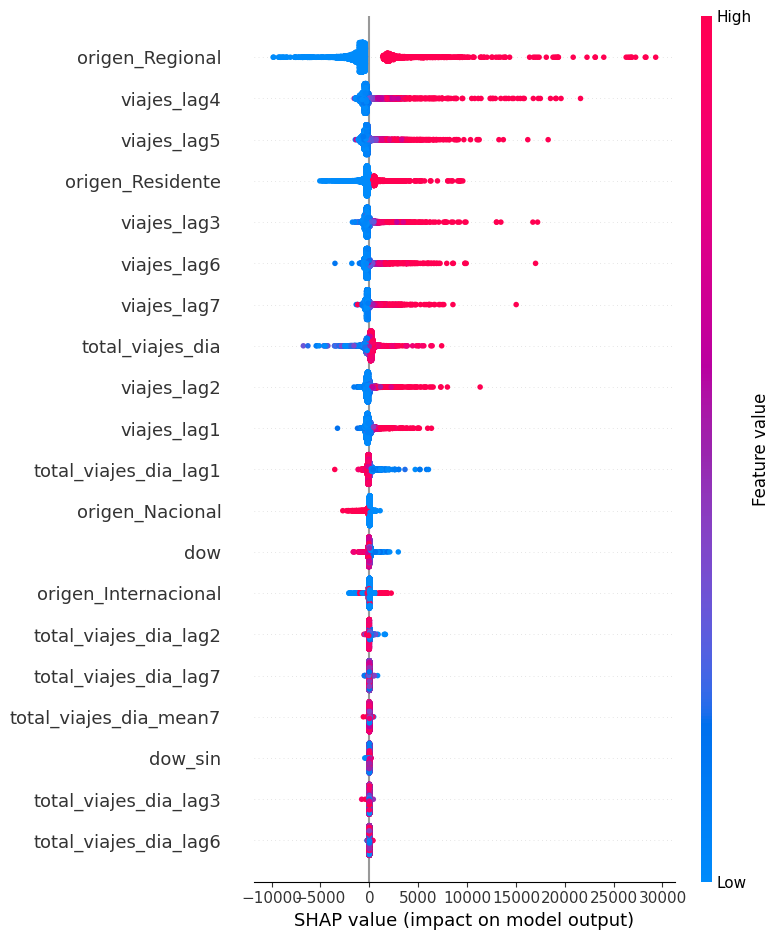

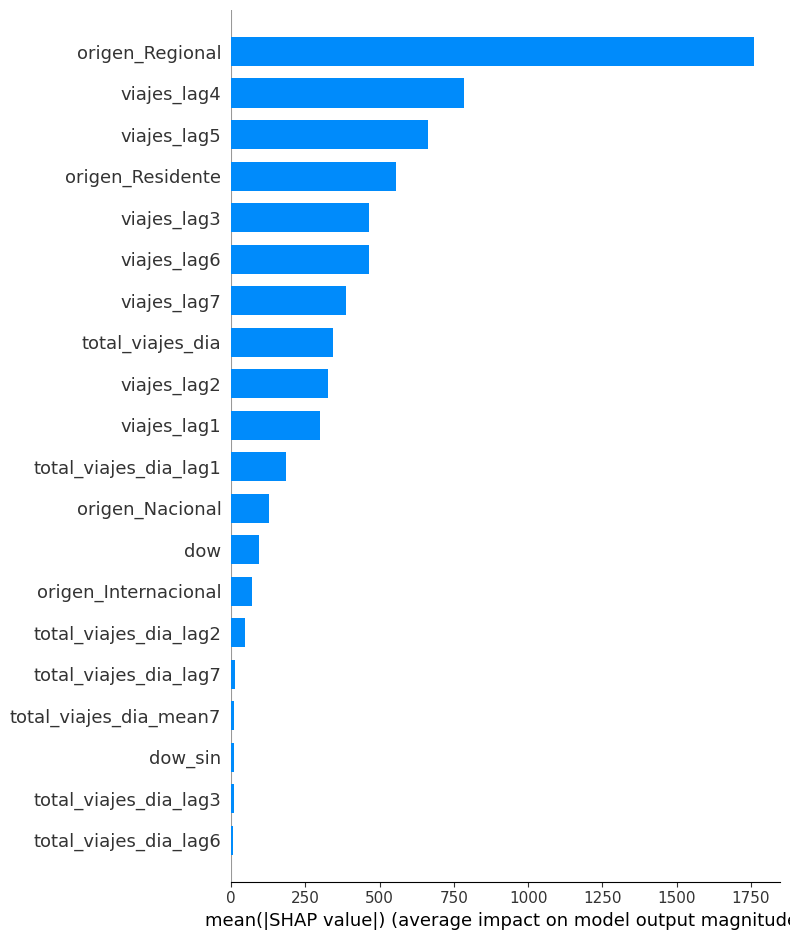


✨ SHAP completado!


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# =========================================
# 0. RECONSTRUIR EVENT CATEGORIES LIMPIAS
# =========================================

# 0.1 Elimina eventcat_ anteriores (que tenían espacios etc.)
old_eventcat_cols = [c for c in df_model.columns if c.startswith("eventcat_")]
df_model = df_model.drop(columns=old_eventcat_cols, errors="ignore")

# 0.2 Limpiar la columna base de categorías
df_model["event_category_clean"] = (
    df_model["event_category"]
    .fillna("none")
    .astype(str)
    .str.strip()
)

def split_categories(x: str):
    if x == "none":
        return []
    # separar por "+" y limpiar espacios de cada categoría
    return [cat.strip() for cat in x.split("+")]

df_model["event_category_list"] = df_model["event_category_clean"].apply(split_categories)

# 0.3 Explode + dummies + agrupar por fecha
tmp_exp = df_model[["date", "event_category_list"]].explode("event_category_list")

event_dummies = pd.get_dummies(tmp_exp["event_category_list"], prefix="eventcat")
event_dummies = event_dummies.groupby(tmp_exp["date"]).max()

# 0.4 Merge de vuelta
df_model = df_model.merge(event_dummies, on="date", how="left")

# 0.5 Rellenar NaN con 0
eventcat_cols = [c for c in df_model.columns if c.startswith("eventcat_")]
df_model[eventcat_cols] = df_model[eventcat_cols].fillna(0).astype(int)

print("Columnas eventcat limpias:", eventcat_cols)


# =========================================
# 1. DEFINIR COLUMNAS DE FEATURES
# =========================================

lag_cols = [f"viajes_lag{i}" for i in range(1, 8)]
total_lag_cols = [f"total_viajes_dia_lag{i}" for i in range(1, 8)]

origen_cols = [c for c in df_model.columns if c.startswith("origen_")]

feature_cols = (
    [
        # temporal
        "month", "dow", "is_weekend",
        "dow_sin", "dow_cos",
        "month_sin", "month_cos",

        # clima
        "tavg", "tmin", "tmax", "prcp",

        # evento agregado
        "event_attendance",

        # totales globales
        "total_viajes_dia",
        "total_viajes_dia_mean7",
    ]
    + lag_cols
    + total_lag_cols
    + eventcat_cols
    + origen_cols
)

target_col = "viajes"

print("\nNúmero total de features:", len(feature_cols))
print(feature_cols)


# =========================================
# 2. TRAIN/TEST SPLIT POR FECHA
# =========================================

df_model["date"] = pd.to_datetime(df_model["date"])

# ejemplo: entrenar hasta 2024-06-30
train_df = df_model[df_model["date"] <= "2024-06-30"].copy()
test_df  = df_model[df_model["date"] >  "2024-06-30"].copy()

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test  = test_df[feature_cols]
y_test  = test_df[target_col]

print("Train size:", X_train.shape, "Test size:", X_test.shape)


# =========================================
# 3. ENTRENAR LIGHTGBM
# =========================================

lgb_model = lgb.LGBMRegressor(
    n_estimators=1200,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
)

lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)


# =========================================
# 4. ENTRENAR XGBOOST
# =========================================

xgb_model = xgb.XGBRegressor(
    n_estimators=1200,
    learning_rate=0.03,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror",
    random_state=42,
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


# =========================================
# 5. EVALUACIÓN (MAE, RMSE, MAPE SEGURO)
# =========================================

def safe_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def evaluate(y_test, y_pred, name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = safe_mape(y_test, y_pred)

    print(f"\n📊 Resultados {name}")
    print("MAE :", round(mae, 2))
    print("RMSE:", round(rmse, 2))
    print("MAPE (safe):", "nan" if np.isnan(mape) else f"{mape:.2f} %")
    return mae, rmse, mape

print("\n===== LightGBM =====")
eval_lgb = evaluate(y_test, lgb_pred, "LightGBM")

print("\n===== XGBoost =====")
eval_xgb = evaluate(y_test, xgb_pred, "XGBoost")


# =========================================
# 6. ESCOGER MEJOR MODELO
# =========================================

best_model = xgb_model if eval_xgb[1] < eval_lgb[1] else lgb_model
best_name  = "XGBoost" if best_model is xgb_model else "LightGBM"

print(f"\n✅ Mejor modelo: {best_name}")


# =========================================
# 7. SHAP (EXPLICABILIDAD)
# =========================================

print("\nCalculando SHAP values... (sample 5000 filas)")

# muestreamos sobre el train para SHAP
X_train_sample = X_train.sample(min(5000, len(X_train)), random_state=42)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_sample)

# Summary plot (features más importantes, distribución de impacto)
shap.summary_plot(shap_values, X_train_sample, show=True)

# Barplot (importancia media absoluta)
shap.summary_plot(shap_values, X_train_sample, plot_type="bar", show=True)

print("\n✨ SHAP completado!")


In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# ============================================================
# MÉTRICAS ADICIONALES
# ============================================================

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) /
                   (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100

def mape_safe(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# ============================================================
# TRAIN / TEST SPLIT TEMPORAL
# ============================================================

df_sorted = df_model.sort_values("date")

# Test = último 20%
test_size = int(len(df_sorted) * 0.20)

df_train = df_sorted.iloc[:-test_size]
df_test  = df_sorted.iloc[-test_size:]

X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test = df_test[feature_cols]
y_test = df_test[target_col]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# ============================================================
# TIME SERIES SPLIT PARA RANDOM SEARCH
# ============================================================

tscv = TimeSeriesSplit(n_splits=3)

# ============================================================
# 1. RANDOM FOREST - Random Search
# ============================================================

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [200, 400, 800],
    "max_depth": [10, 20, 40, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=15,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

# ============================================================
# 2. LIGHTGBM - Random Search
# ============================================================

lgb_model = lgb.LGBMRegressor()

lgb_params = {
    "num_leaves": [31, 50, 100],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.03, 0.05, 0.1],
    "n_estimators": [300, 600, 1000],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

lgb_search = RandomizedSearchCV(
    lgb_model,
    lgb_params,
    n_iter=15,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

lgb_search.fit(X_train, y_train)
lgb_best = lgb_search.best_estimator_

# ============================================================
# 3. XGBOOST - Random Search
# ============================================================

xgb_model = xgb.XGBRegressor(tree_method="hist")

xgb_params = {
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.85, 1],
    "colsample_bytree": [0.7, 0.85, 1],
    "n_estimators": [300, 600, 1000],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 2, 5]
}

xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=15,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_

# ============================================================
# EVALUACIÓN
# ============================================================

def evaluate(model, name):
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAPE:", mape_safe(y_test.values, y_pred))
    print("SMAPE:", smape(y_test.values, y_pred))
    print("R2:", r2_score(y_test, y_pred))

evaluate(rf_best,  "Random Forest")
evaluate(lgb_best, "LightGBM")
evaluate(xgb_best, "XGBoost")

# ============================================================
# ESCOGER MEJOR MODELO
# ============================================================

models = {
    "RF": rf_best,
    "LGBM": lgb_best,
    "XGB": xgb_best
}

best_model = min(
    models.items(),
    key=lambda kv: mean_absolute_error(y_test, kv[1].predict(X_test))
)

print("\n\n🔥 Mejor modelo:", best_model[0])


Train size: (145354, 39), Test size: (36338, 39)
Fitting 3 folds for each of 15 candidates, totalling 45 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 36340, number of used features: 38
[LightGBM] [Info] Start training from score 2515.013594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 36340, number of used features: 38
[LightGBM] [Info] Start training from score 2515.013594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

In [22]:
import pandas as pd
import numpy as np

def extract_cv_models(search_cv, name):
    df = pd.DataFrame({
        "model_type": name,
        "params": search_cv.cv_results_["params"],
        "mean_test_score": search_cv.cv_results_["mean_test_score"],
        "std_test_score": search_cv.cv_results_["std_test_score"]
    })
    return df

df_rf  = extract_cv_models(rf_search,  "RandomForest")
df_lgb = extract_cv_models(lgb_search, "LightGBM")
df_xgb = extract_cv_models(xgb_search, "XGBoost")

df_all = pd.concat([df_rf, df_lgb, df_xgb], ignore_index=True)

# Mean_test_score is NEGATIVE MAE → convert to MAE
df_all["MAE"] = -df_all["mean_test_score"]

# Select top 10 by MAE (CV metric)
df_top10 = df_all.nsmallest(10, "MAE").reset_index(drop=True)

print("🔥 Top 10 models (based on CV MAE):")
display(df_top10)


🔥 Top 10 models (based on CV MAE):


,model_type,params,mean_test_score,std_test_score,MAE
0,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",-432.067147,43.990096,432.067147
1,RandomForest,"{'n_estimators': 400, 'min_samples_split': 5, ...",-432.628942,43.776245,432.628942
2,RandomForest,"{'n_estimators': 800, 'min_samples_split': 2, ...",-436.928927,45.039975,436.928927
3,RandomForest,"{'n_estimators': 800, 'min_samples_split': 5, ...",-437.711801,45.389226,437.711801
4,RandomForest,"{'n_estimators': 400, 'min_samples_split': 2, ...",-443.132048,43.391564,443.132048
5,RandomForest,"{'n_estimators': 400, 'min_samples_split': 2, ...",-443.518077,43.338479,443.518077
6,RandomForest,"{'n_estimators': 800, 'min_samples_split': 10,...",-444.098719,44.243086,444.098719
7,RandomForest,"{'n_estimators': 400, 'min_samples_split': 10,...",-444.112754,43.739913,444.112754
8,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",-444.832279,44.121111,444.832279
9,LightGBM,"{'subsample': 0.7, 'num_leaves': 100, 'n_estim...",-448.924884,52.488825,448.924884


In [23]:
import pandas as pd

# ---------------------------------------
# Helper function to extract CV results
# ---------------------------------------
def extract_cv(search_cv, model_name):
    df = pd.DataFrame({
        "model_type": model_name,
        "params": search_cv.cv_results_["params"],
        "mean_test_score": search_cv.cv_results_["mean_test_score"],  # negative MAE
        "std_test_score": search_cv.cv_results_["std_test_score"]
    })
    return df

# ---------------------------------------
# Collect all models from CV
# ---------------------------------------
df_rf  = extract_cv(rf_search,  "RandomForest")
df_lgb = extract_cv(lgb_search, "LightGBM")
df_xgb = extract_cv(xgb_search, "XGBoost")

df_all = pd.concat([df_rf, df_lgb, df_xgb], ignore_index=True)

# Convert negative MAE → positive
df_all["MAE"] = -df_all["mean_test_score"]

# ---------------------------------------
# Top 10 best models by MAE
# ---------------------------------------
df_top10 = df_all.nsmallest(10, "MAE").reset_index(drop=True)

print("\n🔥 TOP 10 MODELS (based on CV MAE):\n")
for i, row in df_top10.iterrows():
    print(f"#{i+1}")
    print("Model:", row["model_type"])
    print("MAE:", row["MAE"])
    print("Params:")
    for k, v in row["params"].items():
        print(f"   - {k}: {v}")
    print("-" * 40)

# If you want the dataframe too:
display(df_top10)



🔥 TOP 10 MODELS (based on CV MAE):

#1
Model: RandomForest
MAE: 432.0671473475689
Params:
   - n_estimators: 200
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_depth: 40
----------------------------------------
#2
Model: RandomForest
MAE: 432.62894189118333
Params:
   - n_estimators: 400
   - min_samples_split: 5
   - min_samples_leaf: 1
   - max_depth: None
----------------------------------------
#3
Model: RandomForest
MAE: 436.9289274518269
Params:
   - n_estimators: 800
   - min_samples_split: 2
   - min_samples_leaf: 2
   - max_depth: 20
----------------------------------------
#4
Model: RandomForest
MAE: 437.71180073068143
Params:
   - n_estimators: 800
   - min_samples_split: 5
   - min_samples_leaf: 2
   - max_depth: 20
----------------------------------------
#5
Model: RandomForest
MAE: 443.13204819682477
Params:
   - n_estimators: 400
   - min_samples_split: 2
   - min_samples_leaf: 4
   - max_depth: 40
----------------------------------------
#6
Model: RandomFo

,model_type,params,mean_test_score,std_test_score,MAE
0,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",-432.067147,43.990096,432.067147
1,RandomForest,"{'n_estimators': 400, 'min_samples_split': 5, ...",-432.628942,43.776245,432.628942
2,RandomForest,"{'n_estimators': 800, 'min_samples_split': 2, ...",-436.928927,45.039975,436.928927
3,RandomForest,"{'n_estimators': 800, 'min_samples_split': 5, ...",-437.711801,45.389226,437.711801
4,RandomForest,"{'n_estimators': 400, 'min_samples_split': 2, ...",-443.132048,43.391564,443.132048
5,RandomForest,"{'n_estimators': 400, 'min_samples_split': 2, ...",-443.518077,43.338479,443.518077
6,RandomForest,"{'n_estimators': 800, 'min_samples_split': 10,...",-444.098719,44.243086,444.098719
7,RandomForest,"{'n_estimators': 400, 'min_samples_split': 10,...",-444.112754,43.739913,444.112754
8,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",-444.832279,44.121111,444.832279
9,LightGBM,"{'subsample': 0.7, 'num_leaves': 100, 'n_estim...",-448.924884,52.488825,448.924884


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


# ============================================================
# MÉTRICAS
# ============================================================

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) /
                   (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100


def mape_safe(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


# ============================================================
# TRAIN / TEST SPLIT
# ============================================================

df_sorted = df_model.sort_values("date")

test_size = int(len(df_sorted) * 0.20)
df_train = df_sorted.iloc[:-test_size]
df_test = df_sorted.iloc[-test_size:]

X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test = df_test[feature_cols]
y_test = df_test[target_col]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

tscv = TimeSeriesSplit(n_splits=3)

# ============================================================
# 1️⃣ RANDOM FOREST 🔥 refineado con ranges correctos
# ============================================================

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [150, 200, 300, 400],
    "max_depth": [20, 30, 40, None],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2],
}

rf_search = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=12,  # Antes 15 → más rápido
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

# ============================================================
# 2️⃣ LIGHTGBM 🔥 refineado
# ============================================================

lgb_model = lgb.LGBMRegressor()

lgb_params = {
    "num_leaves": [31, 50, 80],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.03, 0.05],
    "n_estimators": [400, 600, 800],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 0.9],
}

lgb_search = RandomizedSearchCV(
    lgb_model,
    lgb_params,
    n_iter=12,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

lgb_search.fit(X_train, y_train)
lgb_best = lgb_search.best_estimator_

# ============================================================
# 3️⃣ XGBOOST 🔥 refineado
# ============================================================

xgb_model = xgb.XGBRegressor(tree_method="hist")

xgb_params = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.7, 0.85],
    "colsample_bytree": [0.7, 0.85],
    "n_estimators": [400, 700, 1000],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 2],
}

xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=12,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_


# ============================================================
# EVALUACIÓN
# ============================================================

def evaluate(model, name):
    y_pred = model.predict(X_test)

    print(f"\n===== {name} =====")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAPE:", mape_safe(y_test.values, y_pred))
    print("SMAPE:", smape(y_test.values, y_pred))
    print("R2:", r2_score(y_test, y_pred))


evaluate(rf_best, "Random Forest")
evaluate(lgb_best, "LightGBM")
evaluate(xgb_best, "XGBoost")

# ============================================================
# MEJOR MODELO
# ============================================================

models = {"RF": rf_best, "LGBM": lgb_best, "XGB": xgb_best}

best_model = min(
    models.items(),
    key=lambda kv: mean_absolute_error(y_test, kv[1].predict(X_test))
)

print("\n🔥 Mejor modelo:", best_model[0])
print(best_model[1])


Train size: (145354, 39), Test size: (36338, 39)
Fitting 3 folds for each of 12 candidates, totalling 36 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 36340, number of used features: 38
[LightGBM] [Info] Start training from score 2515.013594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3478
[LightGBM] [Info] Number of data points in the train set: 36340, number of used features: 38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testi

In [27]:
# ============================================
# EXTRAER TOP-10 MODELS DE RF + LGBM + XGB
# ============================================

def extract_results(search, model_name):
    """Convierte el cv_results_ en un DataFrame legible."""
    df = pd.DataFrame(search.cv_results_)
    df["model"] = model_name
    df = df[["model", "mean_test_score", "params", "rank_test_score"]]
    df["MAE_cv"] = df["mean_test_score"].abs()  # pasar de neg MAE a MAE
    return df

# Extraer resultados de los 3 modelos
df_rf  = extract_results(rf_search,  "RandomForest")
df_lgb = extract_results(lgb_search, "LightGBM")
df_xgb = extract_results(xgb_search, "XGBoost")

# Unir todo en un único dataframe
df_all = pd.concat([df_rf, df_lgb, df_xgb], ignore_index=True)

# Ordenar por CV MAE ascendente (mejor = más pequeño)
df_top10 = df_all.sort_values("MAE_cv").head(20)

# Mostrar top-10
print("🔥 TOP 10 MODELS (based on CV Mean Absolute Error):\n")

for i, row in df_top10.iterrows():
    print(f"#{len(df_top10) - len(df_top10) + i + 1}")
    print(f"Model: {row['model']}")
    print(f"CV MAE: {row['MAE_cv']:.4f}")
    print("Params:")
    for k, v in row["params"].items():
        print(f"   - {k}: {v}")
    print("----------------------------------------")

# Si quieres ver el dataframe completo:
# display(df_all.sort_values("MAE_cv").head(10))


🔥 TOP 10 MODELS (based on CV Mean Absolute Error):

#2
Model: RandomForest
CV MAE: 431.6295
Params:
   - n_estimators: 400
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_depth: 30
----------------------------------------
#7
Model: RandomForest
CV MAE: 431.6843
Params:
   - n_estimators: 300
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_depth: None
----------------------------------------
#8
Model: RandomForest
CV MAE: 432.4569
Params:
   - n_estimators: 300
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_depth: 40
----------------------------------------
#5
Model: RandomForest
CV MAE: 433.1355
Params:
   - n_estimators: 200
   - min_samples_split: 3
   - min_samples_leaf: 1
   - max_depth: None
----------------------------------------
#6
Model: RandomForest
CV MAE: 433.2865
Params:
   - n_estimators: 150
   - min_samples_split: 2
   - min_samples_leaf: 2
   - max_depth: None
----------------------------------------
#9
Model: RandomForest
CV MAE: 4

In [28]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ================
# Metrics (ensure these exist)
# ================

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) /
                   (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100

def mape_safe(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# ================
# Model definition (TOP #14)
# ================

lgb_best14 = lgb.LGBMRegressor(
    subsample=0.9,
    num_leaves=80,
    n_estimators=800,
    max_depth=-1,
    learning_rate=0.03,
    colsample_bytree=0.9
)

# Train
lgb_best14.fit(X_train, y_train)

# Predict
y_pred = lgb_best14.predict(X_test)

# ================
# Metrics
# ================

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mape_safe(y_test.values, y_pred)
smape_val = smape(y_test.values, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔥 RESULTS — LightGBM Model #14")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"SMAPE: {smape_val:.4f}%")
print(f"R²   : {r2:.5f}")
print("\nParameters used:", lgb_best14.get_params())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4858
[LightGBM] [Info] Number of data points in the train set: 145354, number of used features: 39
[LightGBM] [Info] Start training from score 2477.086465

🔥 RESULTS — LightGBM Model #14
MAE  : 431.8492
RMSE : 1266.7506
MAPE : 41.2818%
SMAPE: 40.9350%
R²   : 0.95781

Parameters used: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9, 'importance_type': 'split', 'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 800, 'n_jobs': None, 'num_leaves': 80, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0}


SHAP sample shape: (5000, 39)
Calculando SHAP values (esto puede tardar un poco)...
SHAP values shape: (5000, 39)


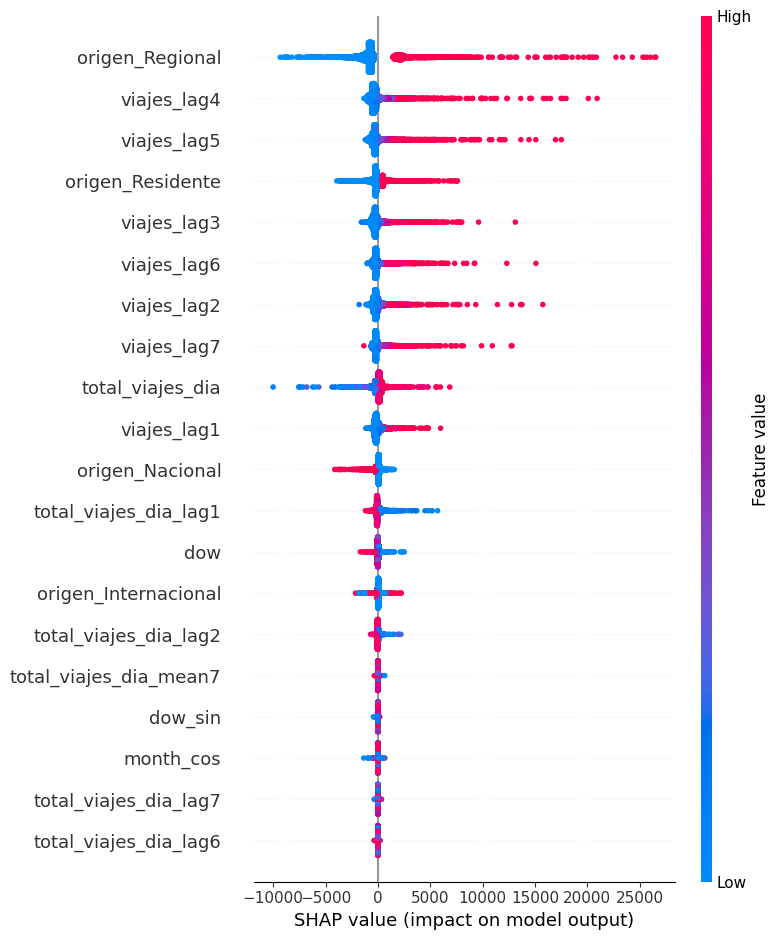

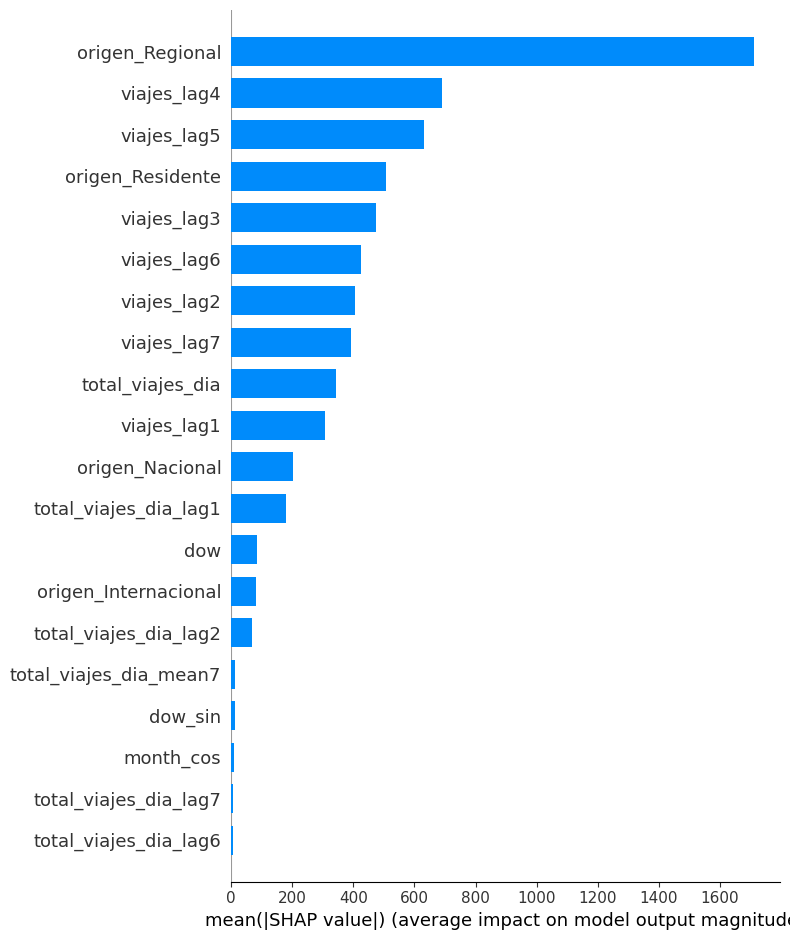

In [30]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. Seleccionar modelo LightGBM #14
# =====================================

model_lgb = lgb_best14 # Si lo guardaste con otro nombre cámbialo aquí

# =====================================
# 2. Sampleo para acelerar SHAP
# =====================================

shap_sample_size = 5000
X_train_sample = X_train.sample(shap_sample_size, random_state=42)

print("SHAP sample shape:", X_train_sample.shape)

# =====================================
# 3. Crear el TreeExplainer
# =====================================

explainer = shap.TreeExplainer(model_lgb)

print("Calculando SHAP values (esto puede tardar un poco)...")
shap_values = explainer.shap_values(X_train_sample)

print("SHAP values shape:", np.array(shap_values).shape)

# =====================================
# 4. Summary Plot (beeswarm)
# =====================================

shap.summary_plot(shap_values, X_train_sample, max_display=20)

# =====================================
# 5. Summary Plot tipo barras
# =====================================

shap.summary_plot(shap_values, X_train_sample, plot_type="bar", max_display=20)

# =====================================
# (Opcional) 6. Force plot para una fila
# =====================================

i = 0  # cambiar a otro índice si quieres analizar otra predicción
shap.force_plot(explainer.expected_value, shap_values[i], X_train_sample.iloc[i, :])


In [37]:
# =============================
# PREDICCIONES PARA 10 PRIMEROS DÍAS DEL TEST
# =============================

# 1. Obtener las primeras 10 fechas del test
first_10_dates = sorted(df_test['date'].unique())[:10]

print("Primeras 10 fechas en test:", first_10_dates)

# 2. Filtrar df_test para esos días
df_subset = df_test[df_test['date'].isin(first_10_dates)].copy()

# 3. Obtener features y predicciones
X_subset = df_subset[feature_cols]
df_subset["predicted_viajes"] = lgb_best14.predict(X_subset)

# 4. Añadir valores reales
df_subset["actual_viajes"] = df_subset[target_col]

# 5. Seleccionar columnas relevantes
result_cols = [
    "date",
    "municipio_origen_name",
    "origen",
    "actual_viajes",
    "predicted_viajes"
]

df_results_10days = df_subset[result_cols].sort_values(["date", "municipio_origen_name"])

df_results_10days.head(10)


Primeras 10 fechas en test: [Timestamp('2024-08-09 00:00:00'), Timestamp('2024-08-10 00:00:00'), Timestamp('2024-08-11 00:00:00'), Timestamp('2024-08-12 00:00:00'), Timestamp('2024-08-13 00:00:00'), Timestamp('2024-08-14 00:00:00'), Timestamp('2024-08-15 00:00:00'), Timestamp('2024-08-16 00:00:00'), Timestamp('2024-08-17 00:00:00'), Timestamp('2024-08-18 00:00:00')]


,date,municipio_origen_name,origen,actual_viajes,predicted_viajes
8099,2024-08-09,Badalona,Internacional,5020,4464.885634
8098,2024-08-09,Badalona,Regional,31070,32280.385940
8097,2024-08-09,Badalona,Residente,12726,11336.150611
8096,2024-08-09,Badalona,Nacional,1651,1417.185220
10719,2024-08-09,Badia del Vallès,Nacional,19,-69.356004
10720,2024-08-09,Badia del Vallès,Regional,714,379.670364
10721,2024-08-09,Badia del Vallès,Residente,35,188.999539
10722,2024-08-09,Badia del Vallès,Internacional,0,44.871841
16487,2024-08-09,Cabrera de Mar,Residente,562,303.100448
16486,2024-08-09,Cabrera de Mar,Nacional,108,84.141774


In [25]:
# ============================================
#   EXPORTAR df_model PARA ENTRENAMIENTO
# ============================================

import os

# Crear copia segura
df_model_training = df_model.copy()

# Carpeta de destino
output_dir = "data/processed"
os.makedirs(output_dir, exist_ok=True)

# Ruta final del archivo
output_path = os.path.join(output_dir, "df_model_training.csv")

# Guardar CSV
df_model_training.to_csv(output_path, index=False)

print("✅ df_model_training guardado correctamente.")
print(f"📁 Ruta: {output_path}")
print(f"📏 Shape: {df_model_training.shape}")

# Mostrar muestra
df_model_training.head()


✅ df_model_training guardado correctamente.
📁 Ruta: data/processed/df_model_training.csv
📏 Shape: (181692, 52)


,day,day_of_week,month,origen,municipio_origen,municipio_origen_name,municipio_destino,municipio_destino_name,viajes,tavg,tmin,tmax,prcp,date,event_attendance,event_category,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,viajes_lag1,viajes_lag2,viajes_lag3,viajes_lag4,viajes_lag5,viajes_lag6,viajes_lag7,viajes_mean7,total_viajes_dia,total_viajes_dia_lag1,total_viajes_dia_lag2,total_viajes_dia_lag3,total_viajes_dia_lag4,total_viajes_dia_lag5,total_viajes_dia_lag6,total_viajes_dia_lag7,total_viajes_dia_mean7,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente,event_category_list,event_category_clean,eventcat_city_festival,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair
0,2023-01-08,Domingo,1,Regional,8003,Alella,8019,Barcelona,1303,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,313.0,2042.0,100.0,697.0,1217.0,228.0,1670.0,895.285714,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,False,True,False,[],none,0,0,0,0,0,0,0
1,2023-01-08,Domingo,1,Residente,8003,Alella,8019,Barcelona,859,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,228.0,842.857143,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,False,False,True,[],none,0,0,0,0,0,0,0
2,2023-01-08,Domingo,1,Nacional,8003,Alella,8019,Barcelona,90,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,859.0,1303.0,313.0,2042.0,100.0,697.0,1217.0,933.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,False,True,False,False,[],none,0,0,0,0,0,0,0
3,2023-01-08,Domingo,1,Internacional,8003,Alella,8019,Barcelona,175,12.7,9.1,15.8,0.0,2023-01-08,0.0,none,6,1,-0.781831,0.62349,0.0,1.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.0,772.000000,341436,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,335650.0,508896.857143,True,False,False,False,[],none,0,0,0,0,0,0,0
4,2023-01-09,Lunes,1,Regional,8003,Alella,8019,Barcelona,2717,14.1,10.9,17.3,0.0,2023-01-09,0.0,none,0,0,0.000000,1.00000,0.0,1.0,175.0,90.0,859.0,1303.0,313.0,2042.0,100.0,697.428571,653004,341436.0,472945.0,391213.0,568603.0,628265.0,603419.0,562183.0,509723.428571,False,False,True,False,[],none,0,0,0,0,0,0,0


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


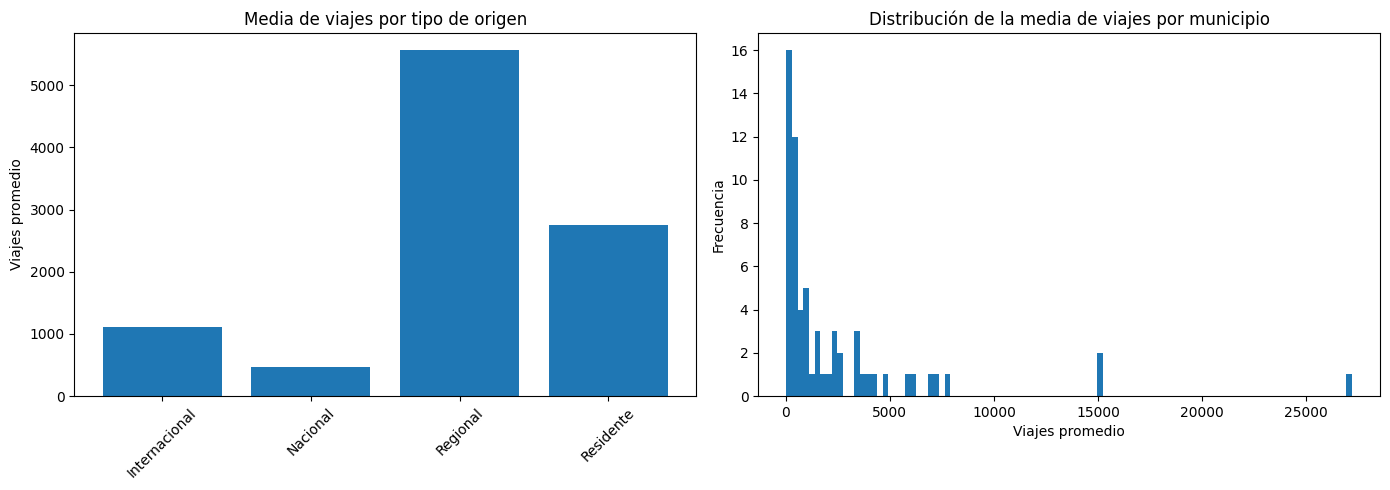

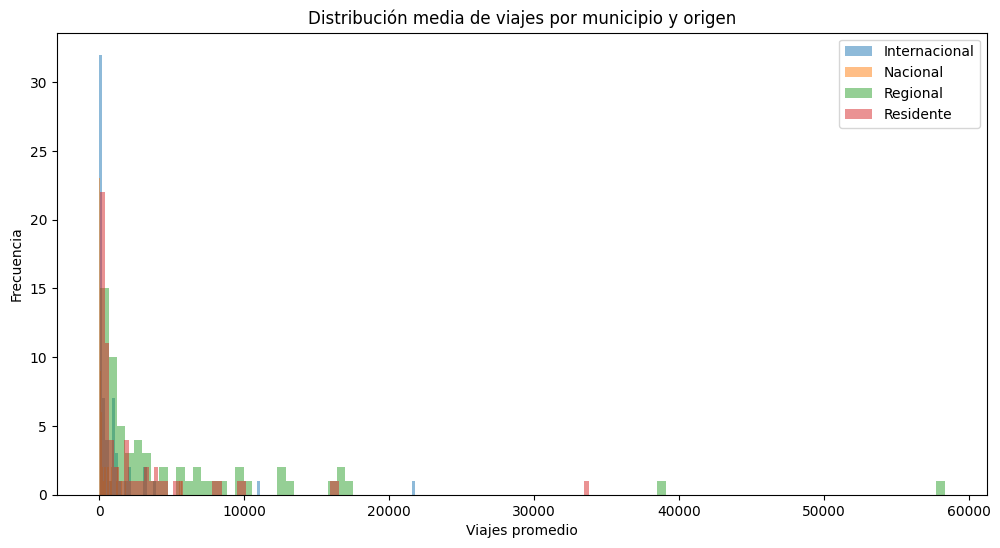

=== VIAJES TOTALES POR ORIGEN ===
origen
Internacional     50197290
Nacional          21220423
Regional         253465986
Residente        125544603
Name: viajes, dtype: int64

=== MEDIA DE VIAJES POR ORIGEN ===
origen
Internacional    1108.572911
Nacional          468.286947
Regional         5564.688270
Residente        2756.374800
Name: viajes, dtype: float64

=== MEDIA POR MUNICIPIO Y ORIGEN (primeras filas) ===


,municipio_origen_name,origen,viajes
0,Alella,Internacional,419.112033
1,Alella,Nacional,104.253112
2,Alella,Regional,2270.442600
3,Alella,Residente,693.165975
4,Argentona,Internacional,83.825726



=== MEDIA POR MUNICIPIO (primeras filas) ===


municipio_origen_name
Santa Maria de Martorelles     28.117002
Vallromanes                    92.301527
Sant Climent de Llobregat      93.282015
Sentmenat                     133.575726
Torrelles de Llobregat        141.298994
Name: viajes, dtype: float64

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1. VIAJES TOTALES POR TIPO DE ORIGEN (GLOBAL)
# ============================================================

viajes_por_origen_total = df_model.groupby("origen")["viajes"].sum()

viajes_por_origen_media = df_model.groupby("origen")["viajes"].mean()


# ============================================================
# 2. MEDIA DE VIAJES POR ORIGEN PARA CADA MUNICIPIO
# ============================================================

media_municipio_origen = (
    df_model.groupby(["municipio_origen_name", "origen"])["viajes"]
    .mean()
    .reset_index()
)


# ============================================================
# 3. MEDIA DE VIAJES POR MUNICIPIO
# ============================================================

media_por_municipio = (
    df_model.groupby("municipio_origen_name")["viajes"]
    .mean()
    .sort_values()
)


# ============================================================
# 4. PLOTS — HISTOGRAMAS
# ============================================================

plt.figure(figsize=(14, 5))

# --- Media de viajes por origen ---
plt.subplot(1, 2, 1)
plt.bar(viajes_por_origen_media.index, viajes_por_origen_media.values)
plt.title("Media de viajes por tipo de origen")
plt.ylabel("Viajes promedio")
plt.xticks(rotation=45)

# --- Media de viajes por municipio ---
plt.subplot(1, 2, 2)
plt.hist(media_por_municipio.values, bins=100)
plt.title("Distribución de la media de viajes por municipio")
plt.xlabel("Viajes promedio")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


# ============================================================
# 5. Histogramas por origen dentro de cada municipio
# ============================================================

plt.figure(figsize=(12, 6))
for origen in media_municipio_origen["origen"].unique():
    subset = media_municipio_origen[media_municipio_origen["origen"] == origen]["viajes"]
    plt.hist(subset, bins=100, alpha=0.5, label=origen)

plt.title("Distribución media de viajes por municipio y origen")
plt.xlabel("Viajes promedio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


# ============================================================
# PRINTS
# ============================================================

print("=== VIAJES TOTALES POR ORIGEN ===")
print(viajes_por_origen_total)

print("\n=== MEDIA DE VIAJES POR ORIGEN ===")
print(viajes_por_origen_media)

print("\n=== MEDIA POR MUNICIPIO Y ORIGEN (primeras filas) ===")
display(media_municipio_origen.head())

print("\n=== MEDIA POR MUNICIPIO (primeras filas) ===")
display(media_por_municipio.head())


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Total features: 39
Train: (145354, 39), Test: (36338, 39)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4858
[LightGBM] [Info] Number of data points in the train set: 145354, number of used features: 39
[LightGBM] [Info] Start training from score 2477.086465

===== LIGHTGBM #14 RESULTS =====
MAE : 430.77259011308166
RMSE: 1266.7243726774232
MAPE: 39.727479732081505
SMAPE: 36.493321261198155
R2: 0.9578074999781628
negatives_before_clipping: 0.037151191590071

Computing GLOBAL SHAP values...
Plotting SHAP summary...


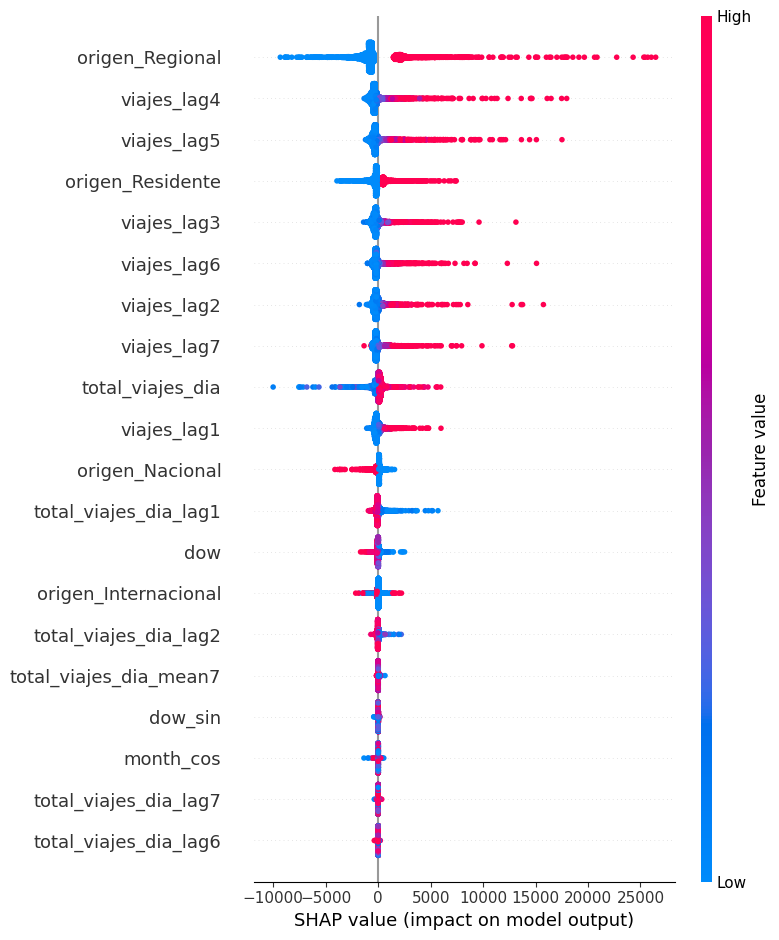


Selecting 5 test samples for LOCAL SHAP...
Chosen indices: [117871, 132217, 45973, 100600, 31386]

--------------------------------------------
📌 LOCAL SHAP for index: 117871
Real value     : 2035
Predicted value: 2372.322306365443

INPUT FEATURES:


,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,...,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente
117871,9,4,0,-0.433884,-0.900969,-0.866025,-0.5,19.3,16.9,22.6,...,0,0,0,0,0,0,False,False,True,False



SHAP Force Plot:


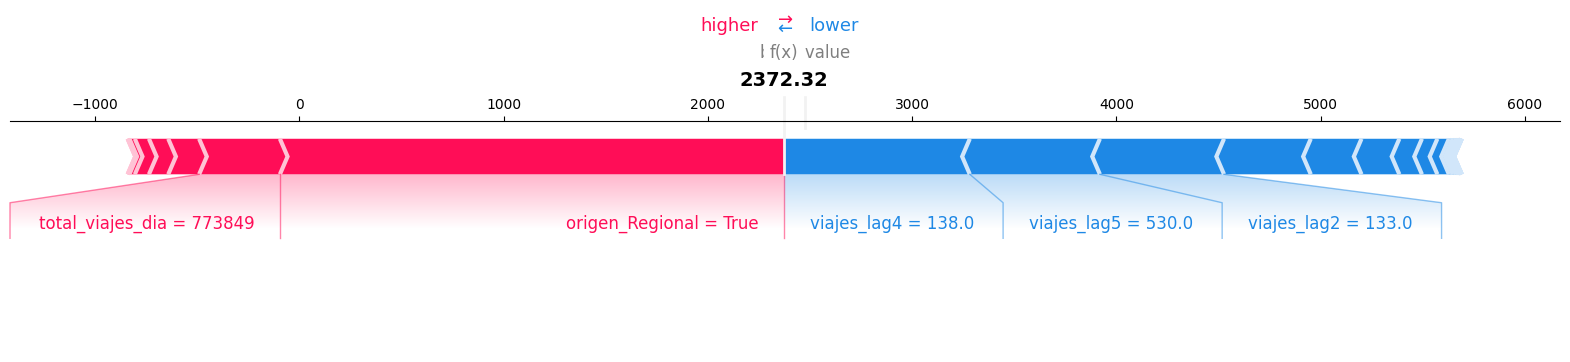


--------------------------------------------
📌 LOCAL SHAP for index: 132217
Real value     : 3111
Predicted value: 3780.724610130199

INPUT FEATURES:


,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,...,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente
132217,8,5,1,-0.974928,-0.222521,-0.5,-0.866025,25.7,23.0,29.6,...,0,0,0,0,0,0,False,False,True,False



SHAP Force Plot:


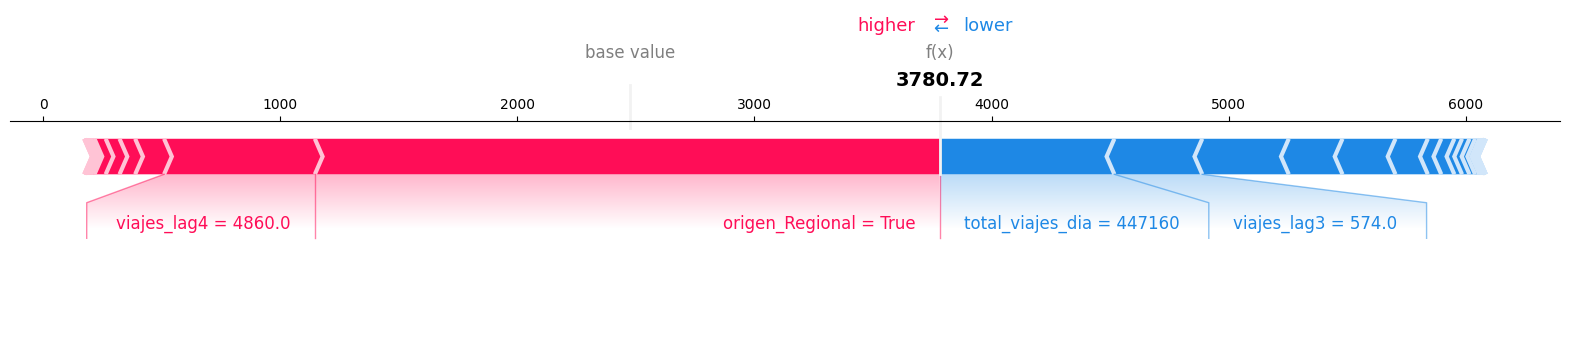


--------------------------------------------
📌 LOCAL SHAP for index: 45973
Real value     : 1005
Predicted value: 742.3615356038792

INPUT FEATURES:


,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,...,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente
45973,12,5,1,-0.974928,-0.222521,-0.5,0.866025,8.0,3.9,14.8,...,0,0,0,0,0,0,True,False,False,False



SHAP Force Plot:


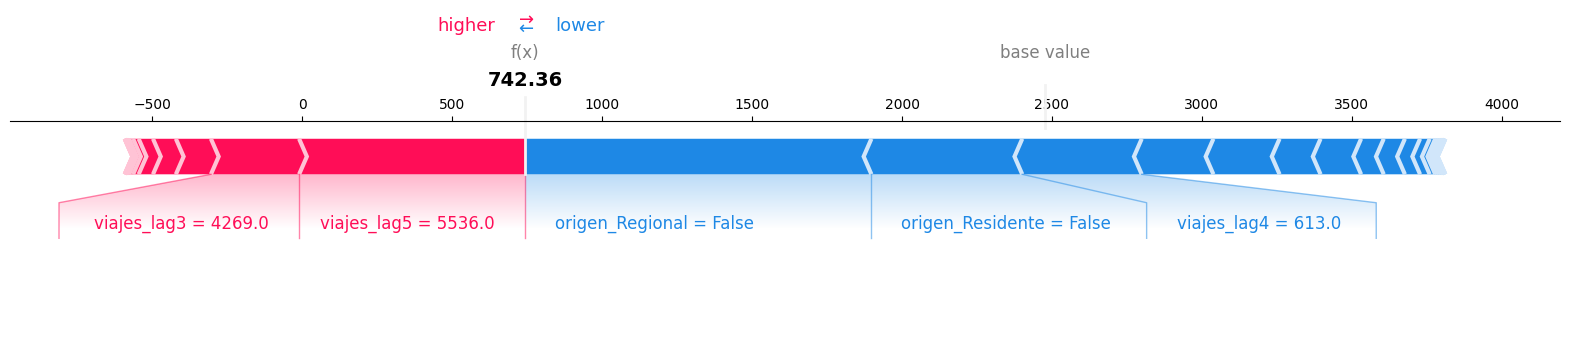


--------------------------------------------
📌 LOCAL SHAP for index: 100600
Real value     : 249
Predicted value: 152.89829844922664

INPUT FEATURES:


,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,...,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente
100600,10,3,0,0.433884,-0.900969,-1.0,-1.836970e-16,19.6,15.5,23.0,...,0,0,0,0,0,0,True,False,False,False



SHAP Force Plot:


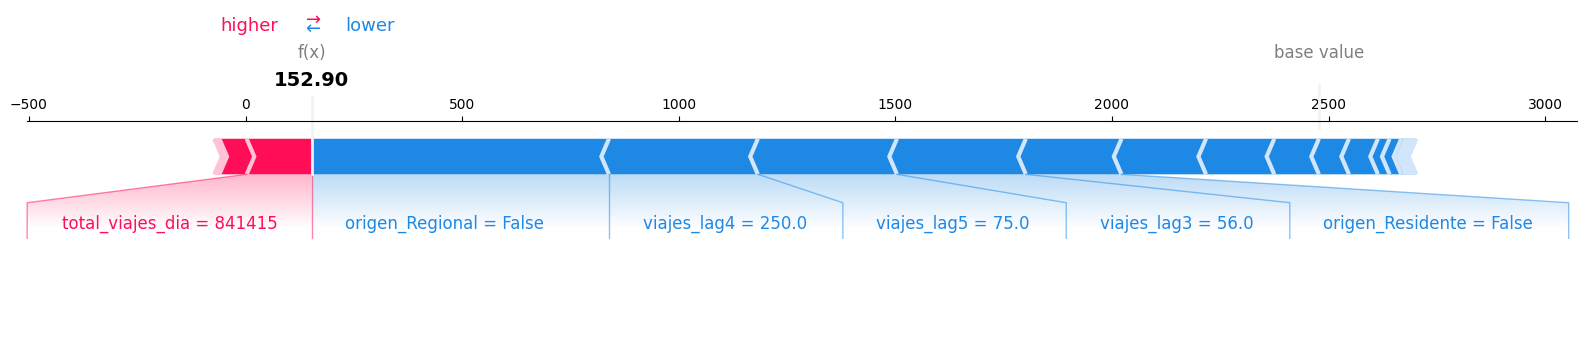


--------------------------------------------
📌 LOCAL SHAP for index: 31386
Real value     : 9473
Predicted value: 12323.102503902792

INPUT FEATURES:


,month,dow,is_weekend,dow_sin,dow_cos,month_sin,month_cos,tavg,tmin,tmax,...,eventcat_concert,eventcat_festival,eventcat_football,eventcat_motorsport,eventcat_other_sport,eventcat_trade_fair,origen_Internacional,origen_Nacional,origen_Regional,origen_Residente
31386,11,2,0,0.974928,-0.222521,-0.866025,0.5,12.3,9.8,18.3,...,0,0,0,0,0,0,False,False,True,False



SHAP Force Plot:


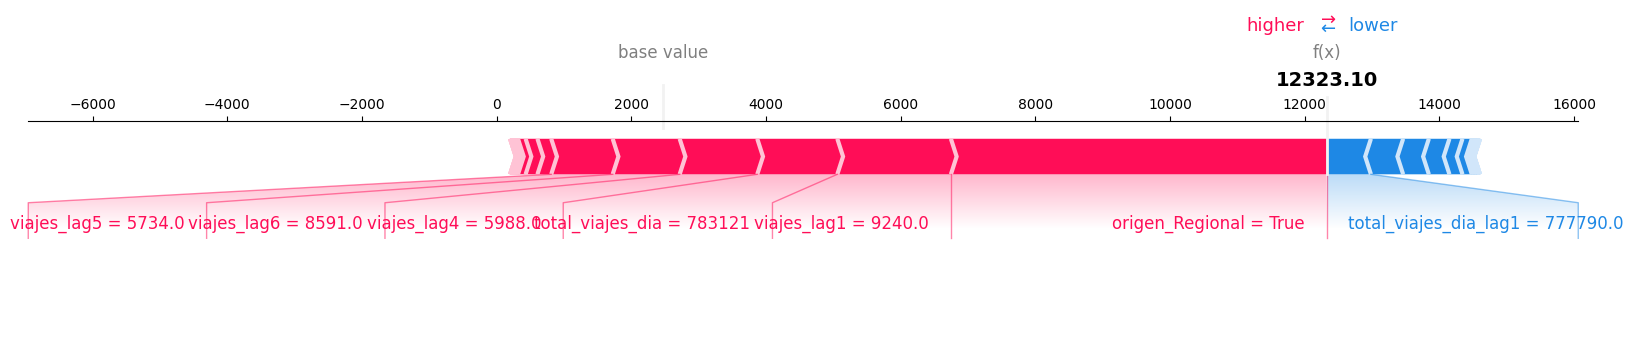

In [1]:
# ============================================================
# FULL LIGHTGBM TRAINING + GLOBAL SHAP + 5 LOCAL SHAP EXPLANATIONS
# ============================================================

import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import random

# To render SHAP force plots nicely
shap.initjs()

# ============================================================
# 1. LOAD DATA
# ============================================================

df = pd.read_csv("data/processed/df_model_training.csv")
df["date"] = pd.to_datetime(df["date"])

# ============================================================
# 2. FEATURES & TARGET
# ============================================================

target_col = "viajes"

feature_cols = [
    'month', 'dow', 'is_weekend',
    'dow_sin', 'dow_cos', 'month_sin', 'month_cos',
    'tavg', 'tmin', 'tmax', 'prcp',
    'event_attendance',
    'total_viajes_dia', 'total_viajes_dia_mean7',

    # lags
    'viajes_lag1', 'viajes_lag2', 'viajes_lag3', 'viajes_lag4',
    'viajes_lag5', 'viajes_lag6', 'viajes_lag7',
    'total_viajes_dia_lag1', 'total_viajes_dia_lag2',
    'total_viajes_dia_lag3', 'total_viajes_dia_lag4',
    'total_viajes_dia_lag5', 'total_viajes_dia_lag6',
    'total_viajes_dia_lag7',

    # event categories
    'eventcat_city_festival', 'eventcat_concert', 'eventcat_festival',
    'eventcat_football', 'eventcat_motorsport',
    'eventcat_other_sport', 'eventcat_trade_fair',

    # origen categories
    'origen_Internacional', 'origen_Nacional',
    'origen_Regional', 'origen_Residente'
]

print("Total features:", len(feature_cols))

# ============================================================
# 3. TRAIN / TEST SPLIT (TEMPORAL)
# ============================================================

df_sorted = df.sort_values("date")
test_size = int(len(df_sorted) * 0.20)

df_train = df_sorted.iloc[:-test_size]
df_test  = df_sorted.iloc[-test_size:]

X_train = df_train[feature_cols]
y_train = df_train[target_col]
X_test  = df_test[feature_cols]
y_test  = df_test[target_col]

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# ============================================================
# 4. TRAIN LIGHTGBM MODEL #14
# ============================================================

lgb_best14 = lgb.LGBMRegressor(
    num_leaves=80,
    max_depth=-1,
    learning_rate=0.03,
    n_estimators=800,
    subsample=0.9,
    colsample_bytree=0.9
)

lgb_best14.fit(X_train, y_train)

# ============================================================
# 5. PREDICT + CLIP
# ============================================================

pred = lgb_best14.predict(X_test)
pred_clip = np.maximum(pred, 0)

# ============================================================
# 6. METRICS
# ============================================================

def mape_safe(y, yhat):
    mask = y != 0
    return np.mean(np.abs((y[mask] - yhat[mask]) / y[mask])) * 100

def smape(y, yhat):
    return np.mean(2 * np.abs(yhat - y) / (np.abs(yhat) + np.abs(y) + 1e-8)) * 100

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n===== LIGHTGBM #14 RESULTS =====")
print("MAE :", mean_absolute_error(y_test, pred_clip))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_clip)))
print("MAPE:", mape_safe(y_test.values, pred_clip))
print("SMAPE:", smape(y_test.values, pred_clip))
print("R2:", r2_score(y_test, pred_clip))
print("negatives_before_clipping:", (pred < 0).mean())

# ============================================================
# 7. GLOBAL SHAP
# ============================================================

print("\nComputing GLOBAL SHAP values...")
sample_for_shap = X_train.sample(4000, random_state=42)

explainer = shap.TreeExplainer(lgb_best14)
shap_values = explainer.shap_values(sample_for_shap)

print("Plotting SHAP summary...")
shap.summary_plot(shap_values, sample_for_shap, plot_type="dot")

# ============================================================
# 8. LOCAL SHAP ON 5 RANDOM TEST PREDICTIONS
# ============================================================

print("\nSelecting 5 test samples for LOCAL SHAP...")

# 2 samples MUST include event days
event_test_idx = df_test[df_test["event_attendance"] > 0].index.tolist()
event_samples = random.sample(event_test_idx, 2) if len(event_test_idx) >= 2 else event_test_idx

# 3 random non-event samples
other_samples = random.sample(list(df_test.index), 3)

chosen_samples = event_samples + other_samples

print(f"Chosen indices: {chosen_samples}")

for idx in chosen_samples:
    print("\n--------------------------------------------")
    print(f"📌 LOCAL SHAP for index: {idx}")

    x = X_test.loc[idx:idx]   # keep as DataFrame
    real = y_test.loc[idx]
    predicted = max(lgb_best14.predict(x)[0], 0)

    print(f"Real value     : {real}")
    print(f"Predicted value: {predicted}")
    print("\nINPUT FEATURES:")
    display(x)

    # SHAP local explanation
    shap_value = explainer.shap_values(x)

    print("\nSHAP Force Plot:")
    shap.force_plot(
        explainer.expected_value,
        shap_value,
        x,
        matplotlib=True
    )
    plt.show()


In [3]:
import os
import json
import shutil
import joblib

# ============================================================
# CONFIG
# ============================================================

delete_old_models = True  # ⬅️ pon True si quieres borrar la carpeta existente

model_dir = "models"
model_subdir = "models/lgb_model_14"

# ============================================================
# 1. Delete old folder if requested
# ============================================================

if delete_old_models and os.path.exists(model_dir):
    shutil.rmtree(model_dir)
    print("🗑 Deleted previous 'models' folder.")

# ============================================================
# 2. Create folder structure
# ============================================================

os.makedirs(model_subdir, exist_ok=True)
print(f"📁 Folder created: {model_subdir}")

# ============================================================
# 3. SAVE MODEL
# ============================================================

model_path = os.path.join(model_subdir, "model.pkl")
joblib.dump(lgb_best14, model_path)
print(f"💾 Saved model → {model_path}")

# ============================================================
# 4. SAVE FEATURE COLS
# ============================================================

feature_cols_path = os.path.join(model_subdir, "feature_cols.json")

with open(feature_cols_path, "w") as f:
    json.dump(feature_cols, f, indent=4)

print(f"💾 Saved feature columns → {feature_cols_path}")

print("\n✅ DONE — model and feature cols saved correctly.")


🗑 Deleted previous 'models' folder.
📁 Folder created: models/lgb_model_14
💾 Saved model → models/lgb_model_14/model.pkl
💾 Saved feature columns → models/lgb_model_14/feature_cols.json

✅ DONE — model and feature cols saved correctly.
